In [2]:
import random 
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker
import sys
sys.setrecursionlimit(10000)
constant = 101*101

In [3]:
class Node:
    def __init__(self,i,j,g,h,previous,counter,largerG):
        self.i = i
        self.j = j
        self.g = g
        self.h = h
        self.f = self.g + self.h
        self.h_new = None
        self.previous = previous
        self.counter = counter
        self.isBlocked = False
        # self.priority = self.f
        self.largerG = largerG
        if self.largerG:
            self.priority = constant*self.f - self.g
        else:
            self.priority = constant*self.f + self.g

    def updateFValue(self):
        self.f = (self.g + self.h_new if self.h_new else self.g+self.h)
        if self.largerG:
            self.priority = constant*self.f - self.g
        else:
            self.priority = constant*self.f + self.g

In [4]:
class MinHeap:
    def __init__(self):
        self.heap = []
    
    def isEmpty(self):
        return len(self.heap) == 0
    
    def addNode(self, node):
        self.heap.append(node)
        self._heapifyUp()
        return self.heap

    def getMinNode(self):
        return self.heap[0]
    
    def popMinNode(self):
        if len(self.heap) == 0:
            return None
        else:
            minEle = self.heap[0]
            self.heap[0] = self.heap[len(self.heap)-1]
            self.heap.pop()
            self._heapifyDown()
            return minEle

    def removeNode(self, node):
        z = search(Node)
        if z:
            removed = self.heap[z]
            self.heap[z] = self.heap[len(self.heap)-1]
            self.heap.pop()
            self._heapifyDownInd(z)
            return removed
    
    def upsert(self,oldNode,newNode):
        z = self.search(oldNode)
        if z:
            self.heap[z] = self.heap[len(self.heap)-1]
            self.heap.pop()
            self._heapifyDownInd(z)
            self.addNode(newNode)
            return self.heap
        else:
            self.addNode(newNode)
            return self.heap
        
    def search(self, node):
        heap = self.heap
        for x in range(0,len(heap)):
            if self.heap[x].i == node.i and self.heap[x].j == node.j:
                return x
                
    def _heapifyUpInd(self, i):
        heap = self.heap
        size = i
        if len(heap) == 1 :
            return heap
        else:
            while size//2 > 0:
                parent = (size)//2 - 1
                curLast = size-1
                if heap[curLast].priority < heap[parent].priority:
                    swpNode = heap[curLast]
                    heap[curLast] = heap[parent]
                    heap[parent] = swpNode
                size = size//2
            return heap

    def _heapifyUp(self):
        self._heapifyUpInd(len(self.heap))
    
    def _heapifyDownInd(self,ind):
        size = len(self.heap)
        curr = ind
        while (curr+1)*2 <= size:
            minInd = self._nextMinNode(curr)      
            if self.heap[minInd].priority < self.heap[curr].priority:
                swpNode = self.heap[minInd]
                self.heap[minInd] = self.heap[curr]
                self.heap[curr] = swpNode
            curr = minInd
        return self.heap

    def _heapifyDown(self):
        self._heapifyDownInd(0)

    def _nextMinNode(self, index):
        if (index+1)*2 + 1 > len(self.heap):
            return index*2 + 1 
        else:
            if self.heap[index*2 + 1].priority < self.heap[index*2 + 2].priority:
                return index*2 + 1
            else:
                return index*2 + 2
    
    def printHeap(self):
        heap = self.heap
        for x in range(0,len(heap)):
            printf("i-",heap[x].i,"j-",heap[x].j,"f-",heap[x].f, "p-",heap[x].priority)
        
    def size(self):
        return len(self.heap)


In [5]:
def generate_random_matrix(input,visited,i,j):
    visited[i][j] = 1
    input[i][j] = 1

    if  j + 1 < len(input) and input[i][j+1] == 0: 
        rand_value = get_rand_value()
        if rand_value == 1:
            generate_random_matrix(input,visited,i,j+1)
        else:
            visited[i][j+1] = 1
            input[i][j+1] = -1
      
    if  j - 1 >= 0 and input[i][j-1] == 0:
        rand_value = get_rand_value()
        if rand_value == 1:
            generate_random_matrix(input,visited,i,j-1)
        else:
            visited[i][j-1] = 1
            input[i][j-1] = -1

    if i -1 >=0 and input[i-1][j] == 0:
        rand_value = get_rand_value()
        if rand_value == 1:
            generate_random_matrix(input,visited,i-1,j)
        else:
            visited[i-1][j] = 1
            input[i-1][j] = -1

    if i + 1 < len(input) and input[i+1][j] == 0:
        rand_value = get_rand_value()
        if rand_value == 1:
            generate_random_matrix(input,visited,i+1,j)
        else:
            visited[i+1][j] = 1
            input[i+1][j] = -1

def get_rand_value():
    rand_value = random.randint(0,9)
    if rand_value in [0,2]:
        return -1
    else:
        return 1

def get_unvisited_indices(visited):
    for i in range(0,len(visited)):
        for j in range(0,len(visited)):
            if visited[i][j] == 0:
                return i,j
    return -1,-1


In [11]:
def updateCounter(i,j,nodes,counter):
    if i >= 0 and i < len(nodes) and j>=0 and j < len(nodes) and nodes[i][j].counter != counter:
        nodes[i][j].counter = counter
        nodes[i][j].g = sys.maxsize - 1000
        nodes[i][j].updateFValue()
        nodes[i][j].previous = None

def addValidNeighbors(open_list, nodes, current_node, counter):
    i = current_node.i
    j = current_node.j
    updateCounter(i - 1,j,nodes,counter)
    if i - 1 >= 0 and current_node.g + 1 < nodes[i - 1][j].g and nodes[i - 1][j].isBlocked == False:
        nodes[i - 1][j].g = current_node.g + 1
        nodes[i - 1][j].updateFValue()
        nodes[i - 1][j].previous = nodes[i][j]
        open_list.upsert(nodes[i-1][j],nodes[i-1][j])
    
    updateCounter(i + 1,j,nodes,counter)
    if i + 1 < len(maze) and current_node.g + 1 < nodes[i + 1][j].g and nodes[i + 1][j].isBlocked == False:
        nodes[i + 1][j].g = current_node.g + 1
        nodes[i + 1][j].updateFValue()
        nodes[i + 1][j].previous = nodes[i][j]
        open_list.upsert(nodes[i+1][j],nodes[i+1][j])

    updateCounter(i,j - 1,nodes,counter)
    if j - 1 >= 0 and current_node.g + 1 < nodes[i][j - 1].g and nodes[i][j - 1].isBlocked == False:
        nodes[i][j - 1].g = current_node.g + 1
        nodes[i][j-1].updateFValue()
        nodes[i][j - 1].previous = nodes[i][j]
        open_list.upsert(nodes[i][j-1],nodes[i][j-1])

    updateCounter(i,j + 1,nodes,counter)
    if j + 1 < len(maze) and current_node.g + 1 < nodes[i][j + 1].g and nodes[i][j + 1].isBlocked == False:
        nodes[i][j + 1].g = current_node.g + 1
        nodes[i][j+1].updateFValue()
        nodes[i][j + 1].previous = nodes[i][j]
        open_list.upsert(nodes[i][j+1],nodes[i][j+1])

def computePath(maze,goal_node,nodes,open_list,counter,expanded_nodes):
    while open_list.size() > 0:   
        current_node = open_list.popMinNode()
        expanded_nodes.append(current_node)
#         printf('current node' + str(current_node.i) + str(current_node.j))
        if nodes[goal_node.i][goal_node.j].priority > current_node.priority:
            addValidNeighbors(open_list,nodes, current_node, counter)
        else:
            printf('Goal node is reached')
            return True
    return False

def updateIsBlocked(nodes,i,j,value):
    if i >= 0 and i < len(nodes) and j>=0 and j < len(nodes):
        nodes[i][j].isBlocked = value

def updateBlockedNeighbors(node,nodes):
    i = node.i
    j = node.j
    if i-1 >= 0 and maze[i-1][j] == -1:
        nodes[i-1][j].isBlocked = True
    if j-1 >= 0 and maze[i][j-1] == -1:
        nodes[i][j-1].isBlocked = True
    if i+1 < len(nodes) and maze[i+1][j] == -1:
        nodes[i+1][j].isBlocked = True
    if j+1 < len(nodes) and maze[i][j+1] == -1:
        nodes[i][j+1].isBlocked = True

def traverseNodes(start_node,goal_node,maze,nodes,backward):
    node = goal_node
    node_list = list()
    path_visualization_matrix = [0] * len(maze)
    distance_from_goal = 0
    for i in range(0,size):
        path_visualization_matrix[i] = [0] * len(maze)

    while node != start_node:
#             printf('traversing nodes in reverse order ' + str(node.i) + str(node.j))
            path_visualization_matrix[node.i][node.j] = 1        
            node_list.append(node)
            old_node = node
            node = node.previous
            old_node.previous = None
            distance_from_goal = distance_from_goal + 1
    
    path_visualization_matrix[node.i][node.j] = 1
    showMaze(path_visualization_matrix,1)
    node_list.append(node)
    if backward:
        node_list.reverse()
#     printf('traversing nodes in reverse order ' + str(node.i) + str(node.j))    
    previous_node = node_list.pop()
    maze[previous_node.i][previous_node.j] = 2
        
    while len(node_list) > 0:
        current_node = node_list.pop()
#         printf('traversing nodes '+ str(current_node.i) + str(current_node.j))
        
        if maze[current_node.i][current_node.j] == -1:
            printf('Blocked at node ' + str(previous_node.i) + str(previous_node.j))
            current_node = previous_node
            break
        else:
            updateBlockedNeighbors(current_node,nodes)
            maze[current_node.i][current_node.j] = 2
            current_node.previous = previous_node
            previous_node = current_node
    showMaze(maze,1)
    return distance_from_goal,current_node

def updateHNew(expanded_nodes,distance_from_destination):
    for node in expanded_nodes:
        if distance_from_destination != None:
            node.h_new = distance_from_destination - node.g
        else:
            node.h_new = None
            
def AStarSearchBackwards(nodes,current_node,maze,goal_node,open_list,adaptive):
    expanded_nodes = []
    counter = 0
    total_expanded_nodes = 0
    while current_node.i != goal_node.i or current_node.j != goal_node.j:
        counter = counter + 1
        updateBlockedNeighbors(current_node,nodes)
        goal_node.g = 0
        goal_node.updateFValue()
        goal_node.counter = counter
        i = goal_node.i
        j = goal_node.j
        if i - 1 >= 0 and nodes[i - 1][j].isBlocked == False:
            nodes[i - 1][j].g = 1
            nodes[i - 1][j].updateFValue()
            nodes[i - 1][j].counter = counter
            nodes[i - 1][j].previous = goal_node
            open_list.addNode(nodes[i-1][j])
        if i + 1 < len(maze) and nodes[i + 1][j].isBlocked == False:
            nodes[i + 1][j].g = 1
            nodes[i + 1][j].updateFValue()
            nodes[i + 1][j].counter = counter
            nodes[i + 1][j].previous = goal_node
            open_list.addNode(nodes[i+1][j])
        if j - 1 >= 0 and nodes[i][j - 1].isBlocked == False:
            nodes[i][j - 1].g = 1
            nodes[i][j - 1].updateFValue()
            nodes[i][j - 1].counter = counter
            nodes[i][j - 1].previous = goal_node
            open_list.addNode(nodes[i][j-1])
        if j + 1 < len(maze) and nodes[i][j + 1].isBlocked == False:
            nodes[i][j + 1].g = 1
            nodes[i][j + 1].updateFValue()
            nodes[i][j + 1].counter = counter
            nodes[i][j + 1].previous = goal_node
            open_list.addNode(nodes[i][j+1])

        current_node.g = sys.maxsize - 1000
        nodes[current_node.i][current_node.j].updateFValue()
        old_expanded_nodes = expanded_nodes
        expanded_nodes = []
        can_reach = computePath(maze,current_node,nodes,open_list,counter,expanded_nodes)
        if adaptive:
            updateHNew(old_expanded_nodes,None)
        total_expanded_nodes = total_expanded_nodes + len(expanded_nodes)
        open_list = MinHeap()
        if can_reach == False:
            printf('cannot reach destination')
            break
        distance_from_node,current_node = traverseNodes(goal_node,current_node,maze,nodes,True)
        if adaptive:
            updateHNew(expanded_nodes,distance_from_node)
        
        printf('new current node is' + str(current_node.i) + str(current_node.j))
    printf('Total number of expanded nodes in the search process ' + str(total_expanded_nodes))
    return total_expanded_nodes, can_reach

def AStarSearch(nodes,current_node,maze,goal_node,open_list,adaptive):
    expanded_nodes = []
    counter = 0
    total_expanded_nodes = 0
    while current_node.i != goal_node.i or current_node.j != goal_node.j:
        counter = counter + 1
        maze[current_node.i][current_node.j] = 2
        current_node.g = 0
        current_node.updateFValue()
        current_node.counter = counter
        i = current_node.i
        j = current_node.j
        if i - 1 >= 0 and maze[i - 1][j] == -1:
            updateIsBlocked(nodes,i - 1,j,True)
        elif i - 1 >= 0:
            nodes[i - 1][j].g = 1
            nodes[i - 1][j].updateFValue()
            nodes[i - 1][j].counter = counter
            nodes[i - 1][j].previous = current_node
            open_list.addNode(nodes[i-1][j])
        if i + 1 < len(maze) and maze[i + 1][j] == -1:
            updateIsBlocked(nodes,i + 1,j,True)
        elif i + 1 < len(maze):
            nodes[i + 1][j].g = 1
            nodes[i + 1][j].updateFValue()
            nodes[i + 1][j].counter = counter
            nodes[i + 1][j].previous = current_node
            open_list.addNode(nodes[i+1][j])
        if j - 1 >= 0 and maze[i][j - 1] == -1:
            updateIsBlocked(nodes,i,j - 1,True)
        elif j - 1 >= 0:
            nodes[i][j - 1].g = 1
            nodes[i][j - 1].updateFValue()
            nodes[i][j - 1].counter = counter
            nodes[i][j - 1].previous = current_node
            open_list.addNode(nodes[i][j-1])
        if j + 1 < len(maze) and maze[i][j + 1] == -1:
            updateIsBlocked(nodes,i,j + 1,True)
        elif j + 1 < len(maze):
            nodes[i][j + 1].g = 1
            nodes[i][j + 1].updateFValue()
            nodes[i][j + 1].counter = counter
            nodes[i][j + 1].previous = current_node
            open_list.addNode(nodes[i][j+1])

        goal_node.g = sys.maxsize - 1000
        nodes[goal_node.i][goal_node.j].updateFValue()
        old_expanded_nodes = expanded_nodes
        expanded_nodes = []
        can_reach = computePath(maze,goal_node,nodes,open_list,counter,expanded_nodes)
        if adaptive:
            updateHNew(old_expanded_nodes,None)
        total_expanded_nodes = total_expanded_nodes + len(expanded_nodes)
        open_list = MinHeap()
        if can_reach == False:
            printf('cannot reach destination')
            break
        distance_from_node,current_node = traverseNodes(current_node,goal_node,maze,nodes,False)
        if adaptive:
            updateHNew(expanded_nodes,distance_from_node)
        
        printf('new current node is' + str(current_node.i) + str(current_node.j))
    printf('Total number of expanded nodes in the search process '+str(total_expanded_nodes))
    return total_expanded_nodes, can_reach


In [12]:
def showMaze(maze, show):
    if show:
        maze = np.array(maze)
        plt.imshow(maze)
        locator = matplotlib.ticker.MultipleLocator(5)
        plt.gca().yaxis.set_major_locator(locator)
        formatter = matplotlib.ticker.StrMethodFormatter("{x:.0f}")
        plt.gca().yaxis.set_major_formatter(formatter)
        plt.show()
        
def validMazeCell(maze, validCellsOnly):
    size = len(maze)
    if validCellsOnly:
        while True:
            i = random.randint(0,size - 1)
            j = random.randint(0,size - 1)
            if maze[i][j] == 1:
                break
    else:
        i = random.randint(0,size - 1)
        j = random.randint(0,size - 1)
    return i,j

def validEndToEnd(maze):
    maze[0][0] = 1
    maze[100][100] = 1
    return maze

def printf(string):
    printExtras = True
    if printExtras:
        print(string)

count 1
[[1, 1, 1, 1, 1, 1, 1, 1, -1, 1, 1, 1, 1, 1, 1, 1, -1, 1, 1, 1, -1, 1, 1, -1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, -1, 1, -1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, -1, 1, 1, 1, 1, 1, -1, -1, 1, 1, 1, -1, 1, 1, -1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, -1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, -1, 1, 1, 1], [1, -1, 1, 1, -1, 1, 1, 1, 1, 1, 1, 1, 1, -1, 1, -1, 1, 1, 1, 1, -1, 1, 1, 1, 1, -1, 1, -1, 1, 1, -1, 1, -1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, -1, 1, -1, 1, 1, 1, 1, 1, -1, 1, 1, -1, 1, 1, 1, -1, 1, -1, 1, 1, -1, 1, 1, 1, 1, -1, -1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, -1], [1, 1, -1, 1, 1, 1, 1, 1, 1, 1, 1, 1, -1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, -1, -1, 1, -1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, -1, 1, -1, 1, 1, 1, 1, 1, 1, 1, 1, -1, 1, 1, 1, -1, 1, 1, -1, 1, 1, 1, 1, -1, 1, -1, 1, 1, 1, 1, 1, 1, 1, 1, -1, 1, 1, -1, -1, 1, 1, 1, 1, 1, 1, 1, 1, -1, 1, -1], [1, -1, 1, 1, -1, 1, 1, 1, 

Goal node is reached


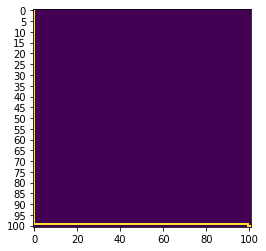

Blocked at node 30


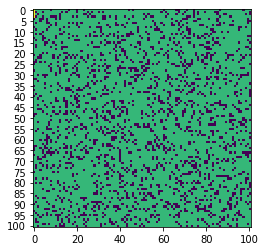

new current node is30
Goal node is reached


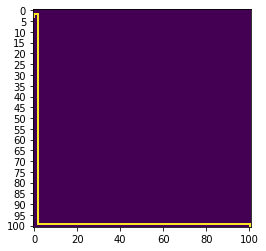

Blocked at node 21


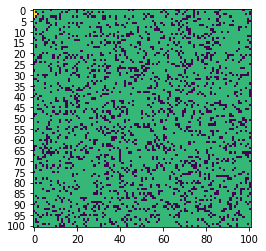

new current node is21
Goal node is reached


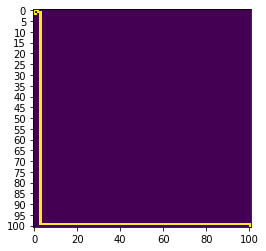

Blocked at node 33


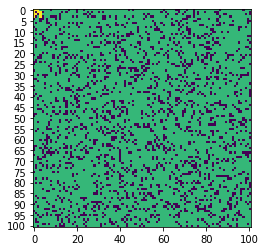

new current node is33
Goal node is reached


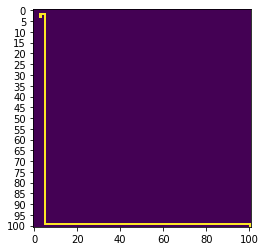

Blocked at node 125


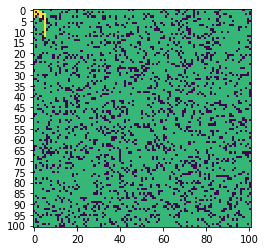

new current node is125
Goal node is reached


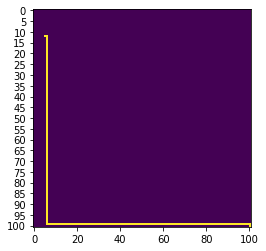

Blocked at node 146


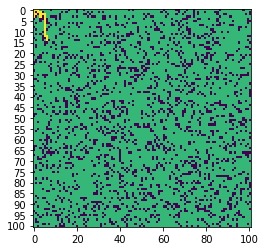

new current node is146
Goal node is reached


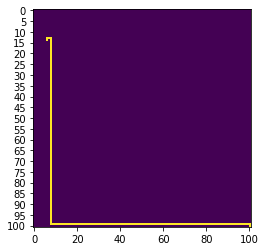

Blocked at node 168


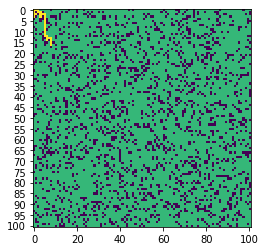

new current node is168
Goal node is reached


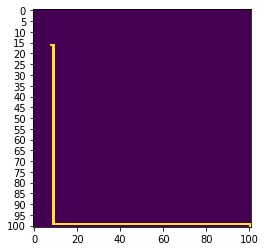

Blocked at node 209


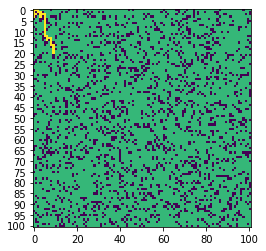

new current node is209
Goal node is reached


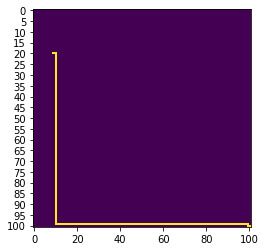

Blocked at node 2810


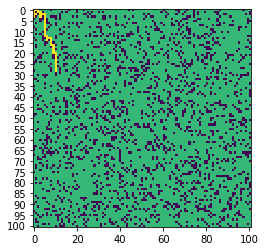

new current node is2810
Goal node is reached


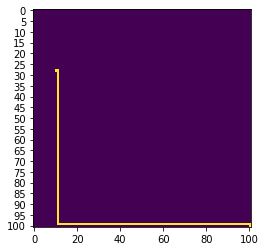

Blocked at node 3311


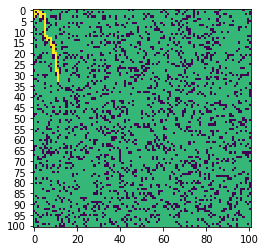

new current node is3311
Goal node is reached


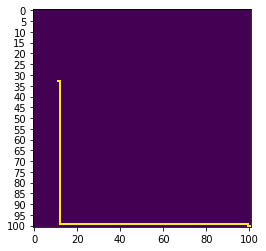

Blocked at node 3412


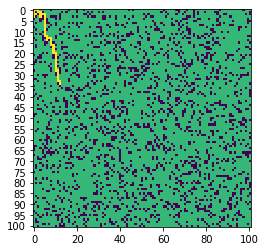

new current node is3412
Goal node is reached


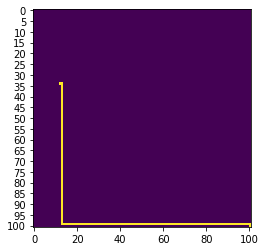

Blocked at node 3513


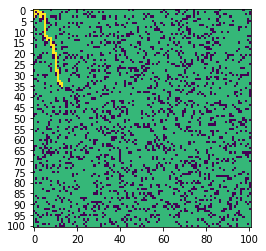

new current node is3513
Goal node is reached


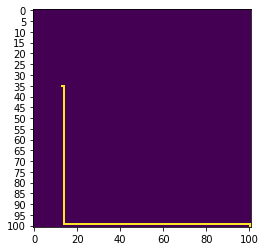

Blocked at node 4014


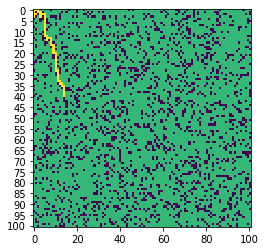

new current node is4014
Goal node is reached


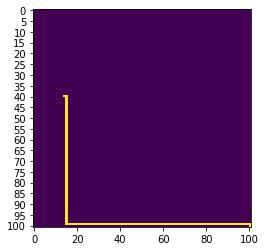

Blocked at node 4115


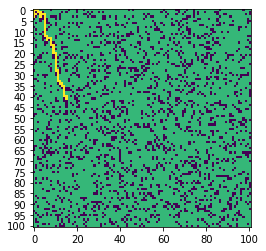

new current node is4115
Goal node is reached


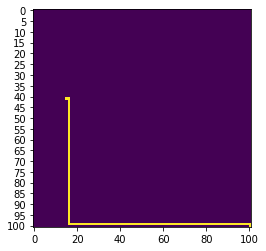

Blocked at node 5116


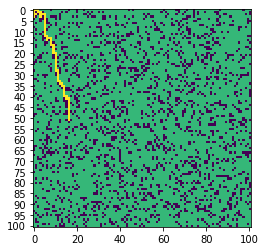

new current node is5116
Goal node is reached


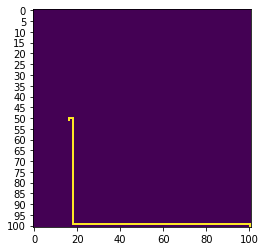

Blocked at node 5418


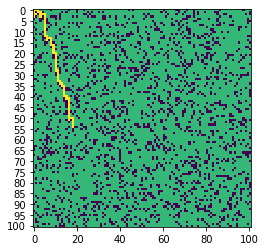

new current node is5418
Goal node is reached


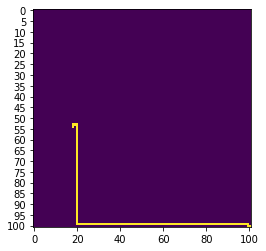

Blocked at node 5320


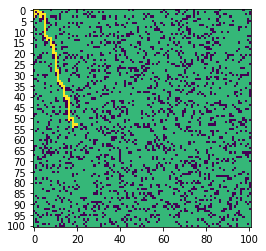

new current node is5320
Goal node is reached


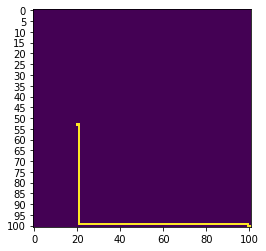

Blocked at node 6121


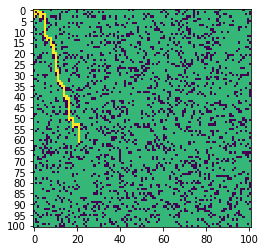

new current node is6121
Goal node is reached


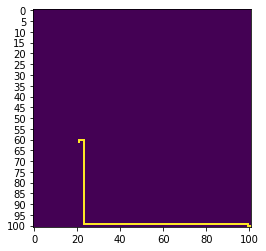

Blocked at node 6323


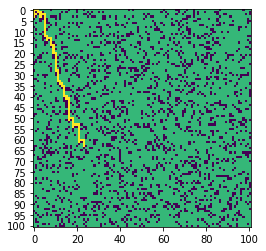

new current node is6323
Goal node is reached


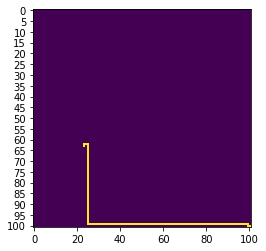

Blocked at node 6525


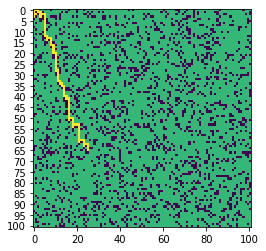

new current node is6525
Goal node is reached


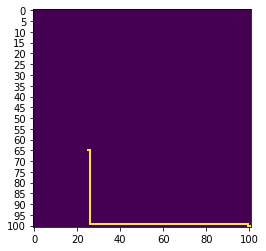

Blocked at node 9426


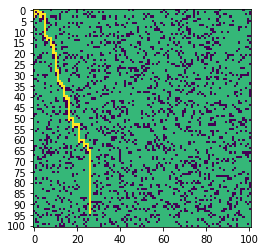

new current node is9426
Goal node is reached


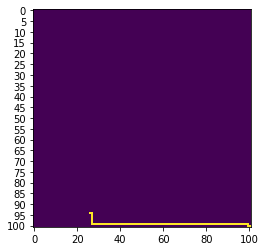

Blocked at node 9930


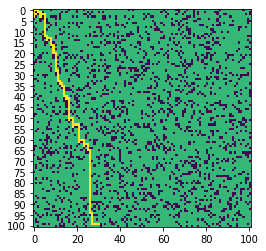

new current node is9930
Goal node is reached


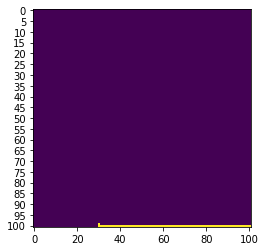

Blocked at node 10030


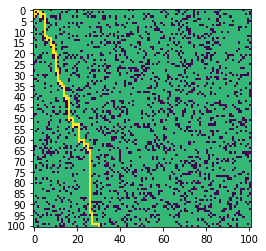

new current node is10030
Goal node is reached


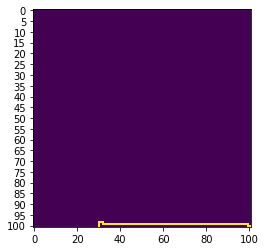

Blocked at node 9932


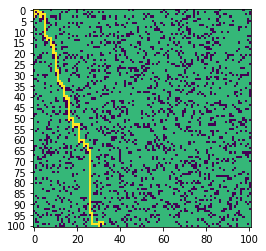

new current node is9932
Goal node is reached


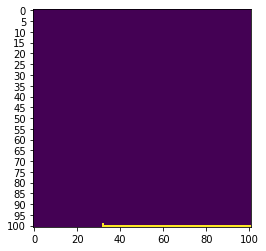

Blocked at node 10038


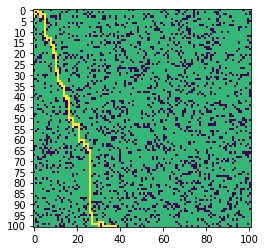

new current node is10038
Goal node is reached


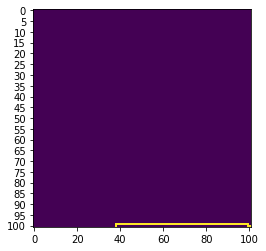

Blocked at node 9942


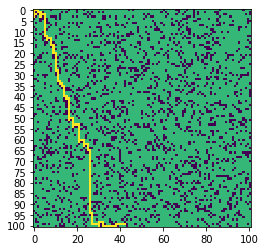

new current node is9942
Goal node is reached


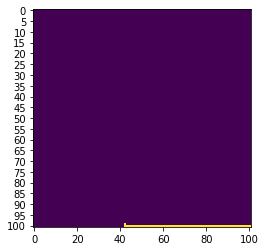

Blocked at node 10042


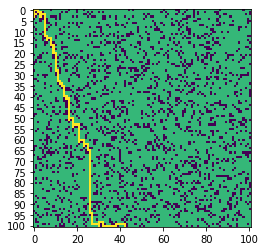

new current node is10042
Goal node is reached


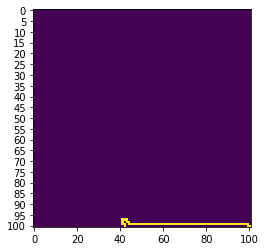

Blocked at node 9841


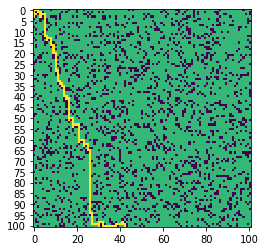

new current node is9841
Goal node is reached


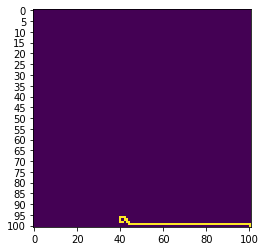

Blocked at node 9641


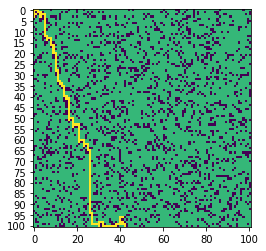

new current node is9641
Goal node is reached


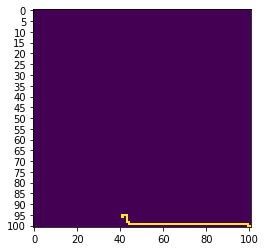

Blocked at node 9542


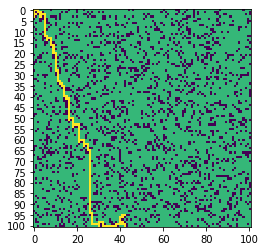

new current node is9542
Goal node is reached


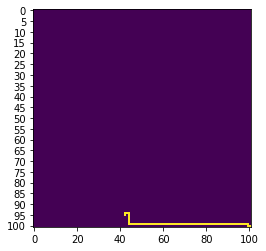

Blocked at node 9444


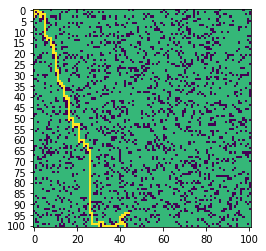

new current node is9444
Goal node is reached


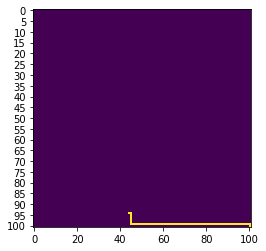

Blocked at node 9645


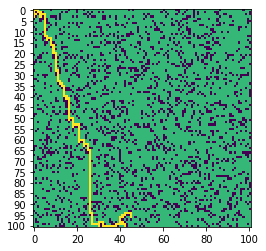

new current node is9645
Goal node is reached


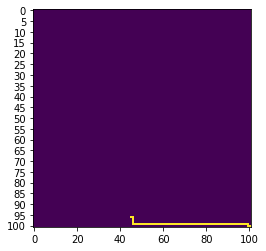

Blocked at node 9946


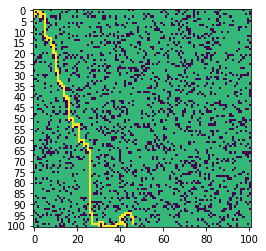

new current node is9946
Goal node is reached


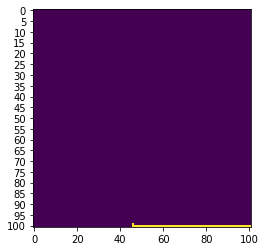

Blocked at node 10048


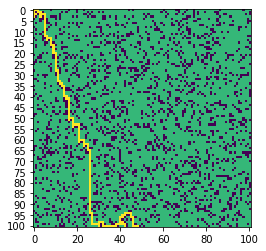

new current node is10048
Goal node is reached


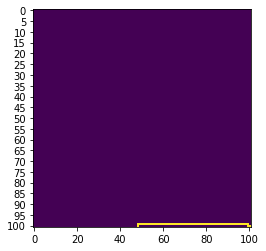

Blocked at node 9949


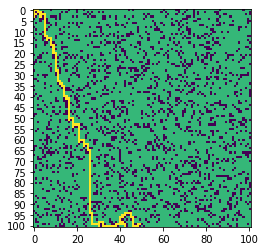

new current node is9949
Goal node is reached


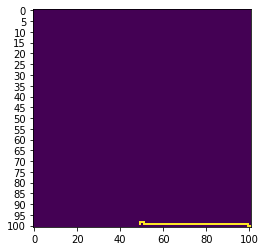

Blocked at node 9966


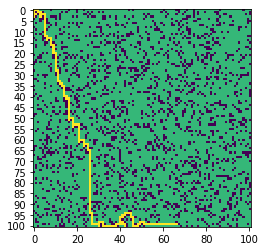

new current node is9966
Goal node is reached


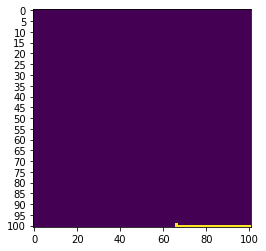

Blocked at node 10067


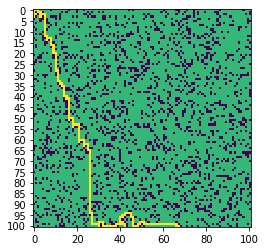

new current node is10067
Goal node is reached


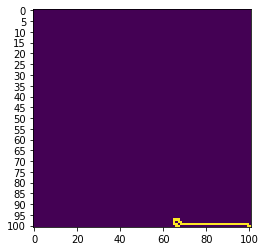

Blocked at node 9979


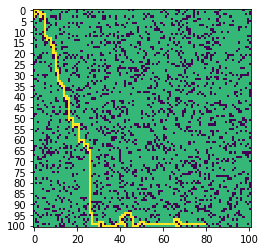

new current node is9979
Goal node is reached


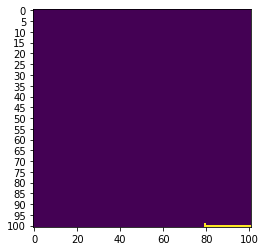

Blocked at node 10080


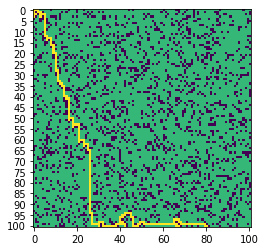

new current node is10080
Goal node is reached


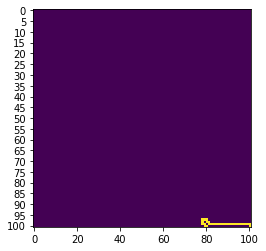

Blocked at node 9878


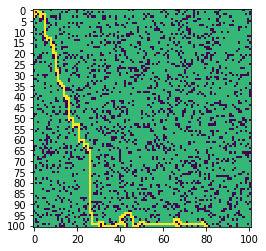

new current node is9878
Goal node is reached


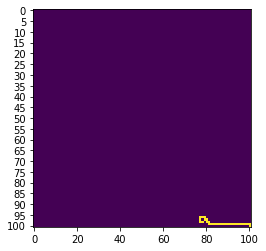

Blocked at node 9982


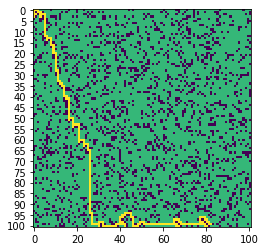

new current node is9982
Goal node is reached


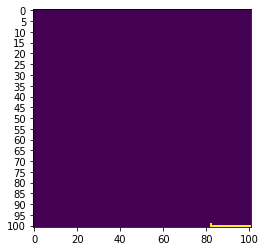

Blocked at node 10085


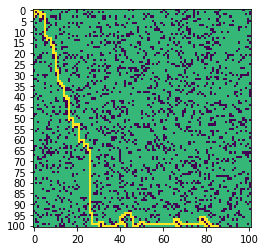

new current node is10085
Goal node is reached


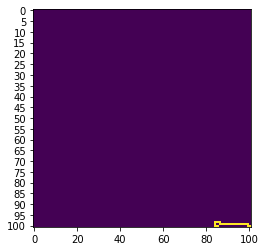

Blocked at node 9885


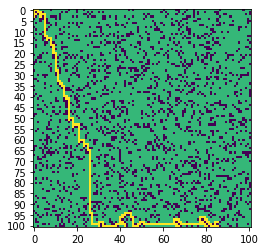

new current node is9885
Goal node is reached


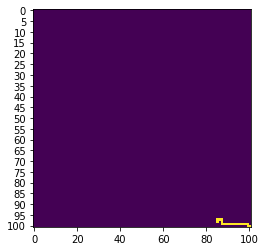

Blocked at node 9786


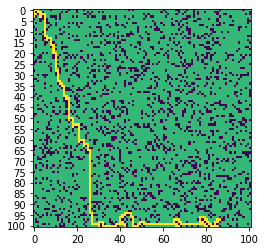

new current node is9786
Goal node is reached


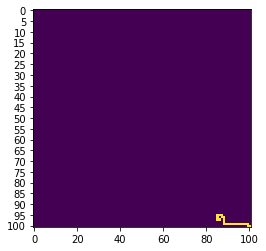

Blocked at node 9687


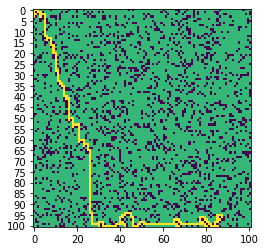

new current node is9687
Goal node is reached


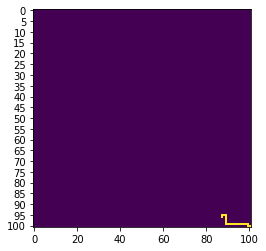

Blocked at node 9989


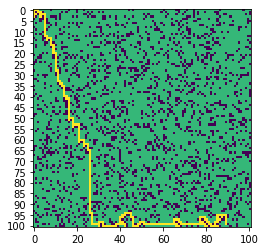

new current node is9989
Goal node is reached


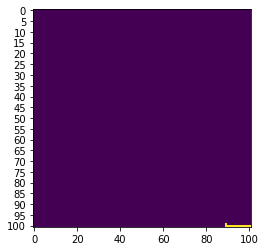

Blocked at node 10090


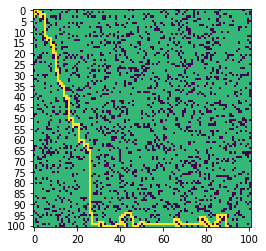

new current node is10090
Goal node is reached


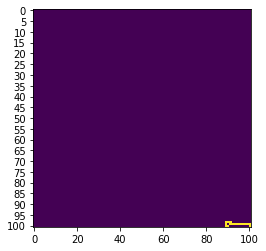

Blocked at node 9993


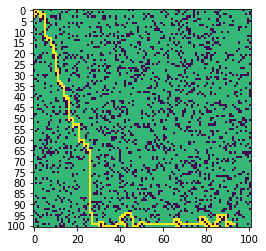

new current node is9993
Goal node is reached


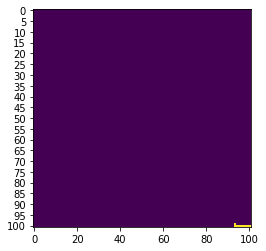

Blocked at node 10093


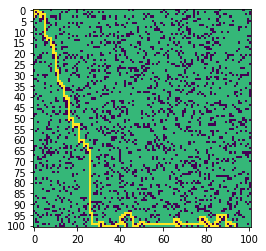

new current node is10093
Goal node is reached


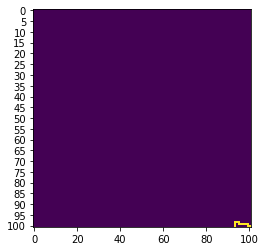

Blocked at node 9998


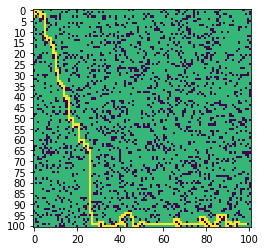

new current node is9998
Goal node is reached


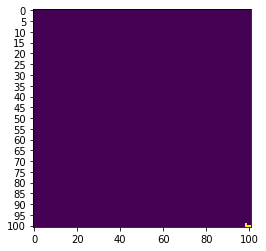

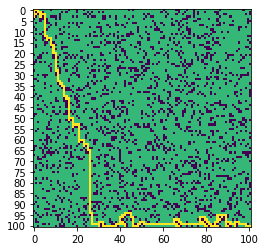

new current node is100100
Total number of expanded nodes in the search process 136382
[[2, 2, 2, 1, 1, 1, 1, 1, -1, 1, 1, 1, 1, 1, 1, 1, -1, 1, 1, 1, -1, 1, 1, -1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, -1, 1, -1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, -1, 1, 1, 1, 1, 1, -1, -1, 1, 1, 1, -1, 1, 1, -1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, -1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, -1, 1, 1, 1], [2, -1, 2, 2, -1, 1, 1, 1, 1, 1, 1, 1, 1, -1, 1, -1, 1, 1, 1, 1, -1, 1, 1, 1, 1, -1, 1, -1, 1, 1, -1, 1, -1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, -1, 1, -1, 1, 1, 1, 1, 1, -1, 1, 1, -1, 1, 1, 1, -1, 1, -1, 1, 1, -1, 1, 1, 1, 1, -1, -1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, -1], [2, 2, -1, 2, 2, 2, 1, 1, 1, 1, 1, 1, -1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, -1, -1, 1, -1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, -1, 1, -1, 1, 1, 1, 1, 1, 1, 1, 1, -1, 1, 1, 1, -1, 1, 1, -1, 1, 1, 1, 1, -1, 1, -1, 1, 1, 1, 1, 1, 1, 1, 1, -1,

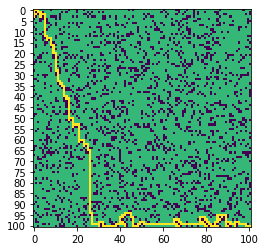

[[1, 1, 1, 1, 1, 1, 1, 1, -1, 1, 1, 1, 1, 1, 1, 1, -1, 1, 1, 1, -1, 1, 1, -1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, -1, 1, -1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, -1, 1, 1, 1, 1, 1, -1, -1, 1, 1, 1, -1, 1, 1, -1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, -1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, -1, 1, 1, 1], [1, -1, 1, 1, -1, 1, 1, 1, 1, 1, 1, 1, 1, -1, 1, -1, 1, 1, 1, 1, -1, 1, 1, 1, 1, -1, 1, -1, 1, 1, -1, 1, -1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, -1, 1, -1, 1, 1, 1, 1, 1, -1, 1, 1, -1, 1, 1, 1, -1, 1, -1, 1, 1, -1, 1, 1, 1, 1, -1, -1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, -1], [1, 1, -1, 1, 1, 1, 1, 1, 1, 1, 1, 1, -1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, -1, -1, 1, -1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, -1, 1, -1, 1, 1, 1, 1, 1, 1, 1, 1, -1, 1, 1, 1, -1, 1, 1, -1, 1, 1, 1, 1, -1, 1, -1, 1, 1, 1, 1, 1, 1, 1, 1, -1, 1, 1, -1, -1, 1, 1, 1, 1, 1, 1, 1, 1, -1, 1, -1], [1, -1, 1, 1, -1, 1, 1, 1, -1, -1, 

In [13]:
# adaptive vs forward a*
expanded_nodes_length_1 = []
expanded_nodes_length_2 = []
for k in range(0,1):
    print( 'count', k+1)
    size = 101
    maze = [0] * size
    maze_for_second_run = [0] * size
    visited = [0] * size

    for i in range(0,size):
        maze[i] = [0] * size
        maze_for_second_run[i] = [0] * size

    for i in range(0,size):
        visited[i] = [0] * size
                            
    i = 0
    j = 0

    while True:
        generate_random_matrix(maze,visited,i,j)
        i,j = get_unvisited_indices(visited)
        if i == -1 and j == -1:
            break
    
    validEndToEnd(maze)
    for i in range(0,size):
        for j in range(0,size):
            maze_for_second_run[i][j] = maze[i][j]

    nodes = [0] * size
    
#     validCellsOnly = True
#     source_i, source_j = validMazeCell(maze,validCellsOnly)
#     destination_i, destination_j = validMazeCell(maze,validCellsOnly)
    source_i, source_j = 0,0
    destination_i, destination_j = 100,100
    
    largerG = True
    for i in range(0,size):
        nodes[i] = [0] * size

    for i in range(0,size):
        for j in range(0, size):
            nodes[i][j] = Node(i,j,sys.maxsize - 1000,abs(destination_i - 1 - i) + abs(destination_j -1 - j),None,-1,largerG)

    open_list = MinHeap()
    printf(maze)
    
#     showMaze(maze,1)

    
    adaptive = False
    
    total_expanded_nodes, can_reach = AStarSearch(nodes,nodes[source_i][source_j],maze,nodes[destination_i][destination_j],open_list,adaptive)
    expanded_nodes_length_1.append(total_expanded_nodes)
#     if can_reach:
#         expanded_nodes_length_1.append(total_expanded_nodes)
    printf(maze)
    showMaze(maze,1)


    open_list = MinHeap()
    printf(maze_for_second_run)
#     showMaze(maze_for_second_run,1)

#     largerG = True
#     for i in range(0,size):
#         for j in range(0, size):
#             nodes[i][j] = Node(i,j,sys.maxsize - 1000,abs(destination_i - 1 - i) + abs(destination_j -1 - j),None,-1,largerG)

#     adaptive = True
#     total_expanded_nodes, can_reach = AStarSearch(nodes,nodes[source_i][source_j],maze_for_second_run,nodes[destination_i][destination_j],open_list,adaptive)
#     expanded_nodes_length_2.append(total_expanded_nodes)
#     if can_reach:
#         expanded_nodes_length_2.append(total_expanded_nodes)
#     showMaze(maze_for_second_run,1)



# print('expanded_nodes_length_1 = ',expanded_nodes_length_1)
# print('expanded_nodes_length_2 = ',expanded_nodes_length_2)

# avgForwardA = int(sum(expanded_nodes_length_1) / len(expanded_nodes_length_1))
# avgAdaptiveA = int(sum(expanded_nodes_length_2) / len(expanded_nodes_length_2))

# # printf('Average FA*', avgForwardA, 'vs AA*', avgAdaptiveA )

# import numpy as np
# import pandas as pd

# df=pd.DataFrame({'x': range(0,len(expanded_nodes_length_1)), 'y1': expanded_nodes_length_1 })
# df1=pd.DataFrame({'x': range(0,len(expanded_nodes_length_2)), 'y2': expanded_nodes_length_2 })
# plt.plot( 'x', 'y1', data=df, color='skyblue', label = 'Forward A*')
# plt.plot( 'x', 'y2', data=df1, color='olive', label = 'Adaptive A*')
# plt.xlabel('Experiment #')
# plt.ylabel('Number of expanded nodes')
# plt.legend(['Forward A*', 'Adaptive A*'], loc='upper left')

# txt_string = 'Average FA* ' + str(avgForwardA) +' vs AA* ' + str(avgAdaptiveA)

# plt.text(-1, -115000, txt_string, bbox=dict(facecolor='red', alpha=0.5))

# plt.show()




count 1
count 2
count 3
count 4
count 5
count 6
count 7
count 8
count 9
count 10
count 11
count 12
count 13
count 14
count 15
count 16
count 17
count 18
count 19
count 20
count 21
count 22
count 23
count 24
count 25
count 26
count 27
count 28
count 29
count 30
count 31
count 32
count 33
count 34
count 35
count 36
count 37
count 38
count 39
count 40
count 41
count 42
count 43
count 44
count 45
count 46
count 47
count 48
count 49
count 50
expanded_nodes_length_1 =  [173862, 168881, 170509, 102282, 152244, 127609, 179621, 119069, 0, 171819, 127977, 177991, 212635, 132201, 101351, 167091, 128191, 20301, 95694, 130046, 175028, 182426, 153805, 120604, 171971, 95780, 180326, 10199, 198657, 203523, 145999, 138877, 129069, 112824, 0, 202652, 161062, 175460, 189906, 100755, 150007, 131825, 180290, 107255, 183204, 173050, 190176, 96333, 155723, 154278]
expanded_nodes_length_2 =  [164708, 133739, 143245, 121446, 120922, 121762, 168452, 172781, 0, 124997, 161488, 165614, 84394, 121088, 109289, 1630

/Users/plaks/Library/Python/3.7/lib/python/site-packages/ipykernel_launcher.py:95: RuntimeWarning: Second argument 'y1' is ambiguous: could be a color spec but is in data; using as data.  Either rename the entry in data or use three arguments to plot.
/Users/plaks/Library/Python/3.7/lib/python/site-packages/ipykernel_launcher.py:96: RuntimeWarning: Second argument 'y2' is ambiguous: could be a color spec but is in data; using as data.  Either rename the entry in data or use three arguments to plot.


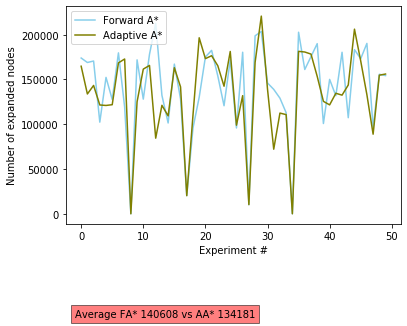

In [20]:
# adaptive vs forward a*
expanded_nodes_length_1 = []
expanded_nodes_length_2 = []
for k in range(0,50):
    print( 'count', k+1)
    size = 101
    maze = [0] * size
    maze_for_second_run = [0] * size
    visited = [0] * size

    for i in range(0,size):
        maze[i] = [0] * size
        maze_for_second_run[i] = [0] * size

    for i in range(0,size):
        visited[i] = [0] * size
                            
    i = 0
    j = 0

    while True:
        generate_random_matrix(maze,visited,i,j)
        i,j = get_unvisited_indices(visited)
        if i == -1 and j == -1:
            break
    
    validEndToEnd(maze)
    for i in range(0,size):
        for j in range(0,size):
            maze_for_second_run[i][j] = maze[i][j]

    nodes = [0] * size
    
#     validCellsOnly = True
#     source_i, source_j = validMazeCell(maze,validCellsOnly)
#     destination_i, destination_j = validMazeCell(maze,validCellsOnly)
    source_i, source_j = 0,0
    destination_i, destination_j = 100,100
    
    largerG = True
    for i in range(0,size):
        nodes[i] = [0] * size

    for i in range(0,size):
        for j in range(0, size):
            nodes[i][j] = Node(i,j,sys.maxsize - 1000,abs(destination_i - 1 - i) + abs(destination_j -1 - j),None,-1,largerG)

    open_list = MinHeap()
    printf(maze)
    
#     showMaze(maze,1)

    
    adaptive = False
    
    total_expanded_nodes, can_reach = AStarSearch(nodes,nodes[source_i][source_j],maze,nodes[destination_i][destination_j],open_list,adaptive)
    expanded_nodes_length_1.append(total_expanded_nodes)
#     if can_reach:
#         expanded_nodes_length_1.append(total_expanded_nodes)
    printf(maze)
#     showMaze(maze,1)


    open_list = MinHeap()
    printf(maze_for_second_run)
#     showMaze(maze_for_second_run,1)

    largerG = True
    for i in range(0,size):
        for j in range(0, size):
            nodes[i][j] = Node(i,j,sys.maxsize - 1000,abs(destination_i - 1 - i) + abs(destination_j -1 - j),None,-1,largerG)

    adaptive = True
    total_expanded_nodes, can_reach = AStarSearch(nodes,nodes[source_i][source_j],maze_for_second_run,nodes[destination_i][destination_j],open_list,adaptive)
    expanded_nodes_length_2.append(total_expanded_nodes)
#     if can_reach:
#         expanded_nodes_length_2.append(total_expanded_nodes)
#     showMaze(maze_for_second_run,1)



print('expanded_nodes_length_1 = ',expanded_nodes_length_1)
print('expanded_nodes_length_2 = ',expanded_nodes_length_2)

avgForwardA = int(sum(expanded_nodes_length_1) / len(expanded_nodes_length_1))
avgAdaptiveA = int(sum(expanded_nodes_length_2) / len(expanded_nodes_length_2))

# printf('Average FA*', avgForwardA, 'vs AA*', avgAdaptiveA )

import numpy as np
import pandas as pd

df=pd.DataFrame({'x': range(0,len(expanded_nodes_length_1)), 'y1': expanded_nodes_length_1 })
df1=pd.DataFrame({'x': range(0,len(expanded_nodes_length_2)), 'y2': expanded_nodes_length_2 })
plt.plot( 'x', 'y1', data=df, color='skyblue', label = 'Forward A*')
plt.plot( 'x', 'y2', data=df1, color='olive', label = 'Adaptive A*')
plt.xlabel('Experiment #')
plt.ylabel('Number of expanded nodes')
plt.legend(['Forward A*', 'Adaptive A*'], loc='upper left')

txt_string = 'Average FA* ' + str(avgForwardA) +' vs AA* ' + str(avgAdaptiveA)

plt.text(-1, -115000, txt_string, bbox=dict(facecolor='red', alpha=0.5))

plt.show()




count 1
count 2
count 3
count 4
count 5
count 6
count 7
count 8
count 9
count 10
count 11
count 12
count 13
count 14
count 15
count 16
count 17
count 18
count 19
count 20
count 21
count 22
count 23
count 24
count 25
count 26
count 27
count 28
count 29
count 30
count 31
count 32
count 33
count 34
count 35
count 36
count 37
count 38
count 39
count 40
count 41
count 42
count 43
count 44
count 45
count 46
count 47
count 48
count 49
count 50
expanded_nodes_length_1 =  [89987, 10199, 90171, 128595, 107561, 110420, 109923, 154799, 151883, 169968, 148901, 0, 168445, 127623, 198015, 176130, 156824, 40105, 157839, 178147, 116647, 172636, 122816, 156528, 139292, 133608, 118173, 136650, 166318, 163690, 175193, 104543, 144252, 245997, 181816, 106916, 158948, 115453, 181399, 168164, 162692, 136474, 20301, 155103, 151236, 97121, 164708, 137845, 209356, 119996]
expanded_nodes_length_2 =  [118247, 10200, 135489, 141225, 147786, 122699, 139364, 113732, 147704, 169890, 176970, 0, 143072, 136394, 169263, 

/Users/plaks/Library/Python/3.7/lib/python/site-packages/ipykernel_launcher.py:93: RuntimeWarning: Second argument 'y1' is ambiguous: could be a color spec but is in data; using as data.  Either rename the entry in data or use three arguments to plot.
/Users/plaks/Library/Python/3.7/lib/python/site-packages/ipykernel_launcher.py:94: RuntimeWarning: Second argument 'y2' is ambiguous: could be a color spec but is in data; using as data.  Either rename the entry in data or use three arguments to plot.


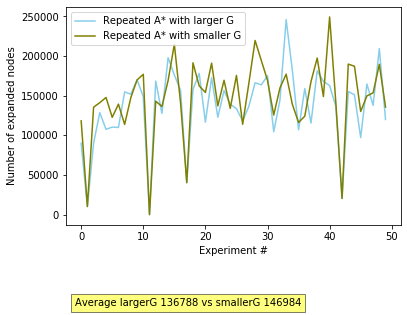

largerG* 136788 vs smalletG 146984


In [22]:
#  largerG vs smallerG
expanded_nodes_length_1 = []
expanded_nodes_length_2 = []
for k in range(0,50):
    print( 'count', k+1)
    size = 101
    maze = [0] * size
    maze_for_second_run = [0] * size
    visited = [0] * size

    for i in range(0,size):
        maze[i] = [0] * size
        maze_for_second_run[i] = [0] * size

    for i in range(0,size):
        visited[i] = [0] * size
                            
    i = 0
    j = 0

    while True:
        generate_random_matrix(maze,visited,i,j)
        i,j = get_unvisited_indices(visited)
        if i == -1 and j == -1:
            break
    validEndToEnd(maze)
    for i in range(0,size):
        for j in range(0,size):
            maze_for_second_run[i][j] = maze[i][j]

    nodes = [0] * size

#     validCellsOnly = True
#     source_i, source_j = validMazeCell(maze,validCellsOnly)
#     destination_i, destination_j = validMazeCell(maze,validCellsOnly)
    
    source_i, source_j = 0,0
    destination_i, destination_j = 100,100
    
    largerG = True
    for i in range(0,size):
        nodes[i] = [0] * size

    for i in range(0,size):
        for j in range(0, size):
            nodes[i][j] = Node(i,j,sys.maxsize - 1000,abs(destination_i - 1 - i) + abs(destination_j -1 - j),None,-1,largerG)

    open_list = MinHeap()
    printf(maze)
    
#     showMaze(maze,1)

    
    adaptive = False
    
    total_expanded_nodes, can_reach = AStarSearch(nodes,nodes[source_i][source_j],maze,nodes[destination_i][destination_j],open_list,adaptive)
    expanded_nodes_length_1.append(total_expanded_nodes)
#     if can_reach:
#         expanded_nodes_length_1.append(total_expanded_nodes)
    printf(maze)
#     showMaze(maze,1)


    open_list = MinHeap()
    printf(maze_for_second_run)
#     showMaze(maze_for_second_run,1)

    largerG = False
    for i in range(0,size):
        for j in range(0, size):
            nodes[i][j] = Node(i,j,sys.maxsize - 1000,abs(destination_i - 1 - i) + abs(destination_j -1 - j),None,-1,largerG)

    adaptive = False
    total_expanded_nodes, can_reach = AStarSearch(nodes,nodes[source_i][source_j],maze_for_second_run,nodes[destination_i][destination_j],open_list,adaptive)
    expanded_nodes_length_2.append(total_expanded_nodes)
#     if can_reach:
#        expanded_nodes_length_2.append(total_expanded_nodes)
#     showMaze(maze_for_second_run,1)



print('expanded_nodes_length_1 = ',expanded_nodes_length_1)
print('expanded_nodes_length_2 = ',expanded_nodes_length_2)

largerG = int(sum(expanded_nodes_length_1) / len(expanded_nodes_length_1))
smallerG = int(sum(expanded_nodes_length_2) / len(expanded_nodes_length_2))

import numpy as np
import pandas as pd

df=pd.DataFrame({'x': range(0,len(expanded_nodes_length_1)), 'y1': expanded_nodes_length_1 })
df1=pd.DataFrame({'x': range(0,len(expanded_nodes_length_2)), 'y2': expanded_nodes_length_2 })
plt.plot( 'x', 'y1', data=df, color='skyblue', label = 'Repeated A* with larger G')
plt.plot( 'x', 'y2', data=df1, color='olive', label = 'Repeated A* with smaller G')
plt.xlabel('Experiment #')
plt.ylabel('Number of expanded nodes')


labels = ['Repeated A* with larger G', 'Repeated A* with smaller G']
plt.legend(labels, loc='upper left')

txt_string = 'Average largerG ' + str(largerG) +' vs smallerG ' + str(smallerG)

plt.text(-1, -115000, txt_string, bbox=dict(facecolor='yellow', alpha=0.5))

plt.show()

print('largerG*', largerG, 'vs smalletG', smallerG )


count 1
count 2
count 3
count 4
count 5
count 6
count 7
count 8
count 9
count 10
count 11
count 12
count 13
count 14
count 15
count 16
count 17
count 18
count 19
count 20
count 21
count 22
count 23
count 24
count 25
count 26
count 27
count 28
count 29
count 30
count 31
count 32
count 33
count 34
count 35
count 36
count 37
count 38
count 39
count 40
count 41
count 42
count 43
count 44
count 45
count 46
count 47
count 48
count 49
count 50
count 51
count 52
count 53
count 54
count 55
count 56
count 57
expanded_nodes_length_1 =  [157916, 155368, 114345, 126535, 143152, 288354, 119251, 106470, 221580, 136074, 193933, 132516, 120110, 147930, 150594, 120855, 102514, 93891, 144274, 162068, 136214, 159826, 154568, 131617, 192354, 179445, 138774, 158362, 127887, 89763, 158911, 181120, 221293, 150683, 125780, 154624, 157916, 98388, 180446, 141067, 191789, 181307, 200714, 85648, 152248, 129504, 117548, 153040, 172198, 185709]
expanded_nodes_length_2 =  [271146, 173317, 231634, 256244, 254308, 3159

/Users/plaks/Library/Python/3.7/lib/python/site-packages/ipykernel_launcher.py:93: RuntimeWarning: Second argument 'y1' is ambiguous: could be a color spec but is in data; using as data.  Either rename the entry in data or use three arguments to plot.
/Users/plaks/Library/Python/3.7/lib/python/site-packages/ipykernel_launcher.py:94: RuntimeWarning: Second argument 'y2' is ambiguous: could be a color spec but is in data; using as data.  Either rename the entry in data or use three arguments to plot.


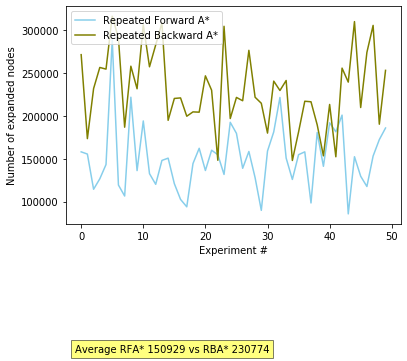

RFA* 150929 vs RBA* 230774


In [23]:
#  forward a* vs backward A*
expanded_nodes_length_1 = []
expanded_nodes_length_2 = []
for k in range(0,1000):
    size = 101
    maze = [0] * size
    maze_for_second_run = [0] * size
    visited = [0] * size

    for i in range(0,size):
        maze[i] = [0] * size
        maze_for_second_run[i] = [0] * size

    for i in range(0,size):
        visited[i] = [0] * size
                            
    i = 0
    j = 0

    while True:
        generate_random_matrix(maze,visited,i,j)
        i,j = get_unvisited_indices(visited)
        if i == -1 and j == -1:
            break
    validEndToEnd(maze)
    for i in range(0,size):
        for j in range(0,size):
            maze_for_second_run[i][j] = maze[i][j]

    nodes = [0] * size

#     validCellsOnly = True
#     source_i, source_j = validMazeCell(maze,validCellsOnly)
#     destination_i, destination_j = validMazeCell(maze,validCellsOnly)
    source_i, source_j = 0,0
    destination_i, destination_j = 100,100
    
    largerG = True
    for i in range(0,size):
        nodes[i] = [0] * size

    for i in range(0,size):
        for j in range(0, size):
            nodes[i][j] = Node(i,j,sys.maxsize - 1000,abs(destination_i - 1 - i) + abs(destination_j -1 - j),None,-1,largerG)

    open_list = MinHeap()    
    adaptive = False
    
    printf(maze)
    print( 'count', k+1)
#     print('start', source_i, source_j, 'end',destination_i, destination_j, 'count', k+1)
    total_expanded_nodes, can_reach = AStarSearch(nodes,nodes[source_i][source_j],maze,nodes[destination_i][destination_j],open_list,adaptive)
#     expanded_nodes_length_1.append(total_expanded_nodes)
    if can_reach:
        expanded_nodes_length_1.append(total_expanded_nodes)
    printf(maze)
#     showMaze(maze,1)


    open_list = MinHeap()
    printf(maze_for_second_run)
#     showMaze(maze_for_second_run,1)

    largerG = True
    for i in range(0,size):
        for j in range(0, size):
            nodes[i][j] = Node(i,j,sys.maxsize - 1000,abs(destination_i - 1 - i) + abs(destination_j -1 - j),None,-1,largerG)

    adaptive = False
    total_expanded_nodes, can_reach = AStarSearchBackwards(nodes,nodes[source_i][source_j],maze_for_second_run,nodes[destination_i][destination_j],open_list,adaptive)
#     expanded_nodes_length_2.append(total_expanded_nodes)
    if can_reach:
        expanded_nodes_length_2.append(total_expanded_nodes)
    if len(expanded_nodes_length_2) == 50:
        break
#     showMaze(maze_for_second_run,1)


# print('start', nodes[source_i][source_j].x, nodes[source_i][source_j].y, 'end',nodes[destination_i][destination_j].x,nodes[destination_i][destination_j].y)
print('expanded_nodes_length_1 = ',expanded_nodes_length_1)
print('expanded_nodes_length_2 = ',expanded_nodes_length_2)


RFA = int(sum(expanded_nodes_length_1) / len(expanded_nodes_length_1))
RBA = int(sum(expanded_nodes_length_2) / len(expanded_nodes_length_2))


import numpy as np
import pandas as pd

df=pd.DataFrame({'x': range(0,len(expanded_nodes_length_1)), 'y1': expanded_nodes_length_1 })
df1=pd.DataFrame({'x': range(0,len(expanded_nodes_length_2)), 'y2': expanded_nodes_length_2 })
plt.plot( 'x', 'y1', data=df, color='skyblue', label = 'Forward A*')
plt.plot( 'x', 'y2', data=df1, color='olive', label = 'Backward A*')
plt.xlabel('Experiment #')
plt.ylabel('Number of expanded nodes')
plt.legend(['Repeated Forward A*', 'Repeated Backward A*'], loc='upper left')

txt_string = 'Average RFA* ' + str(RFA) +' vs RBA* ' + str(RBA)

plt.text(-1, -75000, txt_string, bbox=dict(facecolor='yellow', alpha=0.5))

plt.show()
print('RFA*', RFA, 'vs RBA*', RBA )

In [10]:
# adaptive vs forward a*
expanded_nodes_length_1 = []
expanded_nodes_length_2 = []
for k in range(0,1):
    print( 'count', k+1)
    size = 101
    maze = [0] * size
    maze_for_second_run = [0] * size
    visited = [0] * size

    for i in range(0,size):
        maze[i] = [0] * size
        maze_for_second_run[i] = [0] * size

    for i in range(0,size):
        visited[i] = [0] * size
                            
    i = 0
    j = 0

    while True:
        generate_random_matrix(maze,visited,i,j)
        i,j = get_unvisited_indices(visited)
        if i == -1 and j == -1:
            break
    
    validEndToEnd(maze)
    for i in range(0,size):
        for j in range(0,size):
            maze_for_second_run[i][j] = maze[i][j]

    nodes = [0] * size
    
#     validCellsOnly = True
#     source_i, source_j = validMazeCell(maze,validCellsOnly)
#     destination_i, destination_j = validMazeCell(maze,validCellsOnly)
    source_i, source_j = 0,0
    destination_i, destination_j = 100,100
    
    largerG = True
    for i in range(0,size):
        nodes[i] = [0] * size

    for i in range(0,size):
        for j in range(0, size):
            nodes[i][j] = Node(i,j,sys.maxsize - 1000,abs(destination_i - 1 - i) + abs(destination_j -1 - j),None,-1,largerG)

    open_list = MinHeap()
    printf(maze)
    
#     showMaze(maze,1)

    
    adaptive = False
    
    total_expanded_nodes, can_reach = AStarSearch(nodes,nodes[source_i][source_j],maze,nodes[destination_i][destination_j],open_list,adaptive)
    expanded_nodes_length_1.append(total_expanded_nodes)
#     if can_reach:
#         expanded_nodes_length_1.append(total_expanded_nodes)
    printf(maze)
    showMaze(maze,1)


    open_list = MinHeap()
    printf(maze_for_second_run)
#     showMaze(maze_for_second_run,1)

#     largerG = True
#     for i in range(0,size):
#         for j in range(0, size):
#             nodes[i][j] = Node(i,j,sys.maxsize - 1000,abs(destination_i - 1 - i) + abs(destination_j -1 - j),None,-1,largerG)

#     adaptive = True
#     total_expanded_nodes, can_reach = AStarSearch(nodes,nodes[source_i][source_j],maze_for_second_run,nodes[destination_i][destination_j],open_list,adaptive)
#     expanded_nodes_length_2.append(total_expanded_nodes)
#     if can_reach:
#         expanded_nodes_length_2.append(total_expanded_nodes)
#     showMaze(maze_for_second_run,1)



# print('expanded_nodes_length_1 = ',expanded_nodes_length_1)
# print('expanded_nodes_length_2 = ',expanded_nodes_length_2)

# avgForwardA = int(sum(expanded_nodes_length_1) / len(expanded_nodes_length_1))
# avgAdaptiveA = int(sum(expanded_nodes_length_2) / len(expanded_nodes_length_2))

# # printf('Average FA*', avgForwardA, 'vs AA*', avgAdaptiveA )

# import numpy as np
# import pandas as pd

# df=pd.DataFrame({'x': range(0,len(expanded_nodes_length_1)), 'y1': expanded_nodes_length_1 })
# df1=pd.DataFrame({'x': range(0,len(expanded_nodes_length_2)), 'y2': expanded_nodes_length_2 })
# plt.plot( 'x', 'y1', data=df, color='skyblue', label = 'Forward A*')
# plt.plot( 'x', 'y2', data=df1, color='olive', label = 'Adaptive A*')
# plt.xlabel('Experiment #')
# plt.ylabel('Number of expanded nodes')
# plt.legend(['Forward A*', 'Adaptive A*'], loc='upper left')

# txt_string = 'Average FA* ' + str(avgForwardA) +' vs AA* ' + str(avgAdaptiveA)

# plt.text(-1, -115000, txt_string, bbox=dict(facecolor='red', alpha=0.5))

# plt.show()




count 1
[[1, -1, 1, 1, 1, 1, -1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, -1, -1, 1, -1, 1, 1, 1, 1, 1, -1, -1, 1, 1, -1, 1, 1, 1, 1, 1, -1, 1, 1, 1, -1, 1, 1, 1, -1, 1, 1, 1, 1, -1, 1, -1, 1, 1, 1, 1, 1, 1, 1, -1, 1, 1, 1, 1, -1, -1, 1, 1, 1, 1, -1, 1, -1, 1, 1, 1, 1, -1, -1, 1, 1, 1, -1, 1, 1, 1, -1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, -1, -1], [1, 1, 1, 1, -1, 1, 1, -1, 1, 1, 1, 1, -1, -1, -1, 1, -1, 1, 1, 1, 1, -1, 1, -1, 1, -1, 1, 1, 1, 1, -1, -1, 1, 1, 1, -1, 1, -1, 1, 1, 1, 1, 1, -1, 1, 1, -1, 1, 1, -1, 1, 1, 1, -1, 1, 1, 1, 1, -1, 1, 1, 1, -1, 1, 1, 1, 1, 1, 1, 1, 1, 1, -1, 1, 1, 1, 1, 1, 1, -1, 1, 1, 1, 1, 1, -1, 1, 1, -1, 1, 1, -1, -1, 1, 1, -1, 1, 1, -1, -1, 1], [1, 1, 1, -1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, -1, 1, 1, 1, 1, -1, -1, 1, -1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, -1, 1, 1, 1, 1, -1, 1, 1, -1, -1, -1, -1, 1, 1, -1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, -1, 1, 1, -1, 1, 1, 1, -1, 1, 1, 1, 1, -1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, -1, 1, 1, 1], [1, 1, 

current node9062
current node9063
current node9064
current node9065
current node9066
current node9067
current node9068
current node9069
current node9070
current node9071
current node9072
current node9073
current node9074
current node9075
current node9076
current node9077
current node9078
current node9079
current node9080
current node9081
current node9082
current node9083
current node9084
current node9085
current node9086
current node9087
current node9088
current node9089
current node9090
current node9091
current node9092
current node9093
current node9094
current node9095
current node9096
current node9097
current node9098
current node9099
current node891
current node892
current node893
current node894
current node895
current node896
current node897
current node898
current node899
current node8910
current node8911
current node8912
current node8913
current node8914
current node8915
current node8916
current node8917
current node8918
current node8919
current node8920
current node8921
curren

current node8276
current node8277
current node8278
current node8279
current node8280
current node8281
current node8282
current node8283
current node8284
current node8285
current node8286
current node8287
current node8288
current node8289
current node8290
current node8291
current node8292
current node8293
current node8294
current node8295
current node8296
current node8297
current node8298
current node8299
current node811
current node812
current node813
current node814
current node815
current node816
current node817
current node818
current node819
current node8110
current node8111
current node8112
current node8113
current node8114
current node8115
current node8116
current node8117
current node8118
current node8119
current node8120
current node8121
current node8122
current node8123
current node8124
current node8125
current node8126
current node8127
current node8128
current node8129
current node8130
current node8131
current node8132
current node8133
current node8134
current node8135
curren

current node7593
current node7594
current node7595
current node7596
current node7597
current node7598
current node7599
current node741
current node742
current node743
current node744
current node745
current node746
current node747
current node748
current node749
current node7410
current node7411
current node7412
current node7413
current node7414
current node7415
current node7416
current node7417
current node7418
current node7419
current node7420
current node7421
current node7422
current node7423
current node7424
current node7425
current node7426
current node7427
current node7428
current node7429
current node7430
current node7431
current node7432
current node7433
current node7434
current node7435
current node7436
current node7437
current node7438
current node7439
current node7440
current node7441
current node7442
current node7443
current node7444
current node7445
current node7446
current node7447
current node7448
current node7449
current node7450
current node7451
current node7452
curren

current node6656
current node6657
current node6658
current node6659
current node6660
current node6661
current node6662
current node6663
current node6664
current node6665
current node6666
current node6667
current node6668
current node6669
current node6670
current node6671
current node6672
current node6673
current node6674
current node6675
current node6676
current node6677
current node6678
current node6679
current node6680
current node6681
current node6682
current node6683
current node6684
current node6685
current node6686
current node6687
current node6688
current node6689
current node6690
current node6691
current node6692
current node6693
current node6694
current node6695
current node6696
current node6697
current node6698
current node6699
current node651
current node652
current node653
current node654
current node655
current node656
current node657
current node658
current node659
current node6510
current node6511
current node6512
current node6513
current node6514
current node6515
curren

current node5726
current node5727
current node5728
current node5729
current node5730
current node5731
current node5732
current node5733
current node5734
current node5735
current node5736
current node5737
current node5738
current node5739
current node5740
current node5741
current node5742
current node5743
current node5744
current node5745
current node5746
current node5747
current node5748
current node5749
current node5750
current node5751
current node5752
current node5753
current node5754
current node5755
current node5756
current node5757
current node5758
current node5759
current node5760
current node5761
current node5762
current node5763
current node5764
current node5765
current node5766
current node5767
current node5768
current node5769
current node5770
current node5771
current node5772
current node5773
current node5774
current node5775
current node5776
current node5777
current node5778
current node5779
current node5780
current node5781
current node5782
current node5783
current node57

current node5170
current node5171
current node5172
current node5173
current node5174
current node5175
current node5176
current node5177
current node5178
current node5179
current node5180
current node5181
current node5182
current node5183
current node5184
current node5185
current node5186
current node5187
current node5188
current node5189
current node5190
current node5191
current node5192
current node5193
current node5194
current node5195
current node5196
current node5197
current node5198
current node5199
current node501
current node502
current node503
current node504
current node505
current node506
current node507
current node508
current node509
current node5010
current node5011
current node5012
current node5013
current node5014
current node5015
current node5016
current node5017
current node5018
current node5019
current node5020
current node5021
current node5022
current node5023
current node5024
current node5025
current node5026
current node5027
current node5028
current node5029
curren

current node4335
current node4336
current node4337
current node4338
current node4339
current node4340
current node4341
current node4342
current node4343
current node4344
current node4345
current node4346
current node4347
current node4348
current node4349
current node4350
current node4351
current node4352
current node4353
current node4354
current node4355
current node4356
current node4357
current node4358
current node4359
current node4360
current node4361
current node4362
current node4363
current node4364
current node4365
current node4366
current node4367
current node4368
current node4369
current node4370
current node4371
current node4372
current node4373
current node4374
current node4375
current node4376
current node4377
current node4378
current node4379
current node4380
current node4381
current node4382
current node4383
current node4384
current node4385
current node4386
current node4387
current node4388
current node4389
current node4390
current node4391
current node4392
current node43

current node3684
current node3685
current node3686
current node3687
current node3688
current node3689
current node3690
current node3691
current node3692
current node3693
current node3694
current node3695
current node3696
current node3697
current node3698
current node3699
current node351
current node352
current node353
current node354
current node355
current node356
current node357
current node358
current node359
current node3510
current node3511
current node3512
current node3513
current node3514
current node3515
current node3516
current node3517
current node3518
current node3519
current node3520
current node3521
current node3522
current node3523
current node3524
current node3525
current node3526
current node3527
current node3528
current node3529
current node3530
current node3531
current node3532
current node3533
current node3534
current node3535
current node3536
current node3537
current node3538
current node3539
current node3540
current node3541
current node3542
current node3543
curren

current node2815
current node2816
current node2817
current node2818
current node2819
current node2820
current node2821
current node2822
current node2823
current node2824
current node2825
current node2826
current node2827
current node2828
current node2829
current node2830
current node2831
current node2832
current node2833
current node2834
current node2835
current node2836
current node2837
current node2838
current node2839
current node2840
current node2841
current node2842
current node2843
current node2844
current node2845
current node2846
current node2847
current node2848
current node2849
current node2850
current node2851
current node2852
current node2853
current node2854
current node2855
current node2856
current node2857
current node2858
current node2859
current node2860
current node2861
current node2862
current node2863
current node2864
current node2865
current node2866
current node2867
current node2868
current node2869
current node2870
current node2871
current node2872
current node28

current node2114
current node2115
current node2116
current node2117
current node2118
current node2119
current node2120
current node2121
current node2122
current node2123
current node2124
current node2125
current node2126
current node2127
current node2128
current node2129
current node2130
current node2131
current node2132
current node2133
current node2134
current node2135
current node2136
current node2137
current node2138
current node2139
current node2140
current node2141
current node2142
current node2143
current node2144
current node2145
current node2146
current node2147
current node2148
current node2149
current node2150
current node2151
current node2152
current node2153
current node2154
current node2155
current node2156
current node2157
current node2158
current node2159
current node2160
current node2161
current node2162
current node2163
current node2164
current node2165
current node2166
current node2167
current node2168
current node2169
current node2170
current node2171
current node21

current node1546
current node1547
current node1548
current node1549
current node1550
current node1551
current node1552
current node1553
current node1554
current node1555
current node1556
current node1557
current node1558
current node1559
current node1560
current node1561
current node1562
current node1563
current node1564
current node1565
current node1566
current node1567
current node1568
current node1569
current node1570
current node1571
current node1572
current node1573
current node1574
current node1575
current node1576
current node1577
current node1578
current node1579
current node1580
current node1581
current node1582
current node1583
current node1584
current node1585
current node1586
current node1587
current node1588
current node1589
current node1590
current node1591
current node1592
current node1593
current node1594
current node1595
current node1596
current node1597
current node1598
current node1599
current node141
current node142
current node143
current node144
current node145
cu

current node869
current node870
current node871
current node872
current node873
current node874
current node875
current node876
current node877
current node878
current node879
current node880
current node881
current node882
current node883
current node884
current node885
current node886
current node887
current node888
current node889
current node890
current node891
current node892
current node893
current node894
current node895
current node896
current node897
current node898
current node899
current node71
current node72
current node73
current node74
current node75
current node76
current node77
current node78
current node79
current node710
current node711
current node712
current node713
current node714
current node715
current node716
current node717
current node718
current node719
current node720
current node721
current node722
current node723
current node724
current node725
current node726
current node727
current node728
current node729
current node730
current node731
current node732
c

current node124
current node125
current node126
current node127
current node128
current node129
current node130
current node131
current node132
current node133
current node134
current node135
current node136
current node137
current node138
current node139
current node140
current node141
current node142
current node143
current node144
current node145
current node146
current node147
current node148
current node149
current node150
current node151
current node152
current node153
current node154
current node155
current node156
current node157
current node158
current node159
current node160
current node161
current node162
current node163
current node164
current node165
current node166
current node167
current node168
current node169
current node170
current node171
current node172
current node173
current node174
current node175
current node176
current node177
current node178
current node179
current node180
current node181
current node182
current node183
current node184
current node185
current 

current node9899
current node972
current node973
current node974
current node975
current node976
current node977
current node978
current node979
current node9710
current node9711
current node9712
current node9713
current node9714
current node9715
current node9716
current node9717
current node9718
current node9719
current node9720
current node9721
current node9722
current node9723
current node9724
current node9725
current node9726
current node9727
current node9728
current node9729
current node9730
current node9731
current node9732
current node9733
current node9734
current node9735
current node9736
current node9737
current node9738
current node9739
current node9740
current node9741
current node9742
current node9743
current node9744
current node9745
current node9746
current node9747
current node9748
current node9749
current node9750
current node9751
current node9752
current node9753
current node9754
current node9755
current node9756
current node9757
current node9758
current node9759
curre

current node9257
current node9258
current node9259
current node9260
current node9261
current node9262
current node9263
current node9264
current node9265
current node9266
current node9267
current node9268
current node9269
current node9270
current node9271
current node9272
current node9273
current node9274
current node9275
current node9276
current node9277
current node9278
current node9279
current node9280
current node9281
current node9282
current node9283
current node9284
current node9285
current node9286
current node9287
current node9288
current node9289
current node9290
current node9291
current node9292
current node9293
current node9294
current node9295
current node9296
current node9297
current node9298
current node9299
current node912
current node913
current node914
current node915
current node916
current node917
current node918
current node919
current node9110
current node9111
current node9112
current node9113
current node9114
current node9115
current node9116
current node9117
curre

current node838
current node839
current node8310
current node8311
current node8312
current node8313
current node8314
current node8315
current node8316
current node8317
current node8318
current node8319
current node8320
current node8321
current node8322
current node8323
current node8324
current node8325
current node8326
current node8327
current node8328
current node8329
current node8330
current node8331
current node8332
current node8333
current node8334
current node8335
current node8336
current node8337
current node8338
current node8339
current node8340
current node8341
current node8342
current node8343
current node8344
current node8345
current node8346
current node8347
current node8348
current node8349
current node8350
current node8351
current node8352
current node8353
current node8354
current node8355
current node8356
current node8357
current node8358
current node8359
current node8360
current node8361
current node8362
current node8363
current node8364
current node8365
current node8366

current node7562
current node7563
current node7564
current node7565
current node7566
current node7567
current node7568
current node7569
current node7570
current node7571
current node7572
current node7573
current node7574
current node7575
current node7576
current node7577
current node7578
current node7579
current node7580
current node7581
current node7582
current node7583
current node7584
current node7585
current node7586
current node7587
current node7588
current node7589
current node7590
current node7591
current node7592
current node7593
current node7594
current node7595
current node7596
current node7597
current node7598
current node7599
current node742
current node743
current node744
current node745
current node746
current node747
current node748
current node749
current node7410
current node7411
current node7412
current node7413
current node7414
current node7415
current node7416
current node7417
current node7418
current node7419
current node7420
current node7421
current node7422
curre

current node6899
current node672
current node673
current node674
current node675
current node676
current node677
current node678
current node679
current node6710
current node6711
current node6712
current node6713
current node6714
current node6715
current node6716
current node6717
current node6718
current node6719
current node6720
current node6721
current node6722
current node6723
current node6724
current node6725
current node6726
current node6727
current node6728
current node6729
current node6730
current node6731
current node6732
current node6733
current node6734
current node6735
current node6736
current node6737
current node6738
current node6739
current node6740
current node6741
current node6742
current node6743
current node6744
current node6745
current node6746
current node6747
current node6748
current node6749
current node6750
current node6751
current node6752
current node6753
current node6754
current node6755
current node6756
current node6757
current node6758
current node6759
curre

current node6057
current node6058
current node6059
current node6060
current node6061
current node6062
current node6063
current node6064
current node6065
current node6066
current node6067
current node6068
current node6069
current node6070
current node6071
current node6072
current node6073
current node6074
current node6075
current node6076
current node6077
current node6078
current node6079
current node6080
current node6081
current node6082
current node6083
current node6084
current node6085
current node6086
current node6087
current node6088
current node6089
current node6090
current node6091
current node6092
current node6093
current node6094
current node6095
current node6096
current node6097
current node6098
current node6099
current node592
current node593
current node594
current node595
current node596
current node597
current node598
current node599
current node5910
current node5911
current node5912
current node5913
current node5914
current node5915
current node5916
current node5917
curre

current node543
current node544
current node545
current node546
current node547
current node548
current node549
current node5410
current node5411
current node5412
current node5413
current node5414
current node5415
current node5416
current node5417
current node5418
current node5419
current node5420
current node5421
current node5422
current node5423
current node5424
current node5425
current node5426
current node5427
current node5428
current node5429
current node5430
current node5431
current node5432
current node5433
current node5434
current node5435
current node5436
current node5437
current node5438
current node5439
current node5440
current node5441
current node5442
current node5443
current node5444
current node5445
current node5446
current node5447
current node5448
current node5449
current node5450
current node5451
current node5452
current node5453
current node5454
current node5455
current node5456
current node5457
current node5458
current node5459
current node5460
current node5461
curr

current node474
current node475
current node476
current node477
current node478
current node479
current node4710
current node4711
current node4712
current node4713
current node4714
current node4715
current node4716
current node4717
current node4718
current node4719
current node4720
current node4721
current node4722
current node4723
current node4724
current node4725
current node4726
current node4727
current node4728
current node4729
current node4730
current node4731
current node4732
current node4733
current node4734
current node4735
current node4736
current node4737
current node4738
current node4739
current node4740
current node4741
current node4742
current node4743
current node4744
current node4745
current node4746
current node4747
current node4748
current node4749
current node4750
current node4751
current node4752
current node4753
current node4754
current node4755
current node4756
current node4757
current node4758
current node4759
current node4760
current node4761
current node4762
cur

current node402
current node403
current node404
current node405
current node406
current node407
current node408
current node409
current node4010
current node4011
current node4012
current node4013
current node4014
current node4015
current node4016
current node4017
current node4018
current node4019
current node4020
current node4021
current node4022
current node4023
current node4024
current node4025
current node4026
current node4027
current node4028
current node4029
current node4030
current node4031
current node4032
current node4033
current node4034
current node4035
current node4036
current node4037
current node4038
current node4039
current node4040
current node4041
current node4042
current node4043
current node4044
current node4045
current node4046
current node4047
current node4048
current node4049
current node4050
current node4051
current node4052
current node4053
current node4054
current node4055
current node4056
current node4057
current node4058
current node4059
current node4060
curre

current node3424
current node3425
current node3426
current node3427
current node3428
current node3429
current node3430
current node3431
current node3432
current node3433
current node3434
current node3435
current node3436
current node3437
current node3438
current node3439
current node3440
current node3441
current node3442
current node3443
current node3444
current node3445
current node3446
current node3447
current node3448
current node3449
current node3450
current node3451
current node3452
current node3453
current node3454
current node3455
current node3456
current node3457
current node3458
current node3459
current node3460
current node3461
current node3462
current node3463
current node3464
current node3465
current node3466
current node3467
current node3468
current node3469
current node3470
current node3471
current node3472
current node3473
current node3474
current node3475
current node3476
current node3477
current node3478
current node3479
current node3480
current node3481
current node34

current node2854
current node2855
current node2856
current node2857
current node2858
current node2859
current node2860
current node2861
current node2862
current node2863
current node2864
current node2865
current node2866
current node2867
current node2868
current node2869
current node2870
current node2871
current node2872
current node2873
current node2874
current node2875
current node2876
current node2877
current node2878
current node2879
current node2880
current node2881
current node2882
current node2883
current node2884
current node2885
current node2886
current node2887
current node2888
current node2889
current node2890
current node2891
current node2892
current node2893
current node2894
current node2895
current node2896
current node2897
current node2898
current node2899
current node272
current node273
current node274
current node275
current node276
current node277
current node278
current node279
current node2710
current node2711
current node2712
current node2713
current node2714
curre

current node212
current node213
current node214
current node215
current node216
current node217
current node218
current node219
current node2110
current node2111
current node2112
current node2113
current node2114
current node2115
current node2116
current node2117
current node2118
current node2119
current node2120
current node2121
current node2122
current node2123
current node2124
current node2125
current node2126
current node2127
current node2128
current node2129
current node2130
current node2131
current node2132
current node2133
current node2134
current node2135
current node2136
current node2137
current node2138
current node2139
current node2140
current node2141
current node2142
current node2143
current node2144
current node2145
current node2146
current node2147
current node2148
current node2149
current node2150
current node2151
current node2152
current node2153
current node2154
current node2155
current node2156
current node2157
current node2158
current node2159
current node2160
curre

current node1588
current node1589
current node1590
current node1591
current node1592
current node1593
current node1594
current node1595
current node1596
current node1597
current node1598
current node1599
current node142
current node143
current node144
current node145
current node146
current node147
current node148
current node149
current node1410
current node1411
current node1412
current node1413
current node1414
current node1415
current node1416
current node1417
current node1418
current node1419
current node1420
current node1421
current node1422
current node1423
current node1424
current node1425
current node1426
current node1427
current node1428
current node1429
current node1430
current node1431
current node1432
current node1433
current node1434
current node1435
current node1436
current node1437
current node1438
current node1439
current node1440
current node1441
current node1442
current node1443
current node1444
current node1445
current node1446
current node1447
current node1448
curre

current node230
current node240
current node250
current node260
current node270
current node280
current node290
current node300
current node310
current node320
current node330
current node340
current node350
current node360
current node370
current node380
current node390
current node400
current node410
current node420
current node430
current node440
current node450
current node460
current node470
current node480
current node490
current node500
current node510
current node520
current node530
current node540
current node550
current node560
current node570
current node580
current node590
current node600
current node610
current node620
current node630
current node640
current node650
current node660
current node670
current node680
current node690
current node700
current node710
current node720
current node730
current node740
current node750
current node760
current node770
current node780
current node790
current node800
current node810
current node820
current node830
current node840
current 

current node9388
current node9389
current node9390
current node9391
current node9392
current node9393
current node9394
current node9395
current node9396
current node9397
current node9398
current node9399
current node921
current node922
current node923
current node924
current node925
current node926
current node927
current node928
current node929
current node9210
current node9211
current node9212
current node9213
current node9214
current node9215
current node9216
current node9217
current node9218
current node9219
current node9220
current node9221
current node9222
current node9223
current node9224
current node9225
current node9226
current node9227
current node9228
current node9229
current node9230
current node9231
current node9232
current node9233
current node9234
current node9235
current node9236
current node9237
current node9238
current node9239
current node9240
current node9241
current node9242
current node9243
current node9244
current node9245
current node9246
current node9247
curren

current node8516
current node8517
current node8518
current node8519
current node8520
current node8521
current node8522
current node8523
current node8524
current node8525
current node8526
current node8527
current node8528
current node8529
current node8530
current node8531
current node8532
current node8533
current node8534
current node8535
current node8536
current node8537
current node8538
current node8539
current node8540
current node8541
current node8542
current node8543
current node8544
current node8545
current node8546
current node8547
current node8548
current node8549
current node8550
current node8551
current node8552
current node8553
current node8554
current node8555
current node8556
current node8557
current node8558
current node8559
current node8560
current node8561
current node8562
current node8563
current node8564
current node8565
current node8566
current node8567
current node8568
current node8569
current node8570
current node8571
current node8572
current node8573
current node85

current node7968
current node7969
current node7970
current node7971
current node7972
current node7973
current node7974
current node7975
current node7976
current node7977
current node7978
current node7979
current node7980
current node7981
current node7982
current node7983
current node7984
current node7985
current node7986
current node7987
current node7988
current node7989
current node7990
current node7991
current node7992
current node7993
current node7994
current node7995
current node7996
current node7997
current node7998
current node7999
current node781
current node782
current node783
current node784
current node785
current node786
current node787
current node788
current node789
current node7810
current node7811
current node7812
current node7813
current node7814
current node7815
current node7816
current node7817
current node7818
current node7819
current node7820
current node7821
current node7822
current node7823
current node7824
current node7825
current node7826
current node7827
curren

current node7235
current node7236
current node7237
current node7238
current node7239
current node7240
current node7241
current node7242
current node7243
current node7244
current node7245
current node7246
current node7247
current node7248
current node7249
current node7250
current node7251
current node7252
current node7253
current node7254
current node7255
current node7256
current node7257
current node7258
current node7259
current node7260
current node7261
current node7262
current node7263
current node7264
current node7265
current node7266
current node7267
current node7268
current node7269
current node7270
current node7271
current node7272
current node7273
current node7274
current node7275
current node7276
current node7277
current node7278
current node7279
current node7280
current node7281
current node7282
current node7283
current node7284
current node7285
current node7286
current node7287
current node7288
current node7289
current node7290
current node7291
current node7292
current node72

current node6169
current node6170
current node6171
current node6172
current node6173
current node6174
current node6175
current node6176
current node6177
current node6178
current node6179
current node6180
current node6181
current node6182
current node6183
current node6184
current node6185
current node6186
current node6187
current node6188
current node6189
current node6190
current node6191
current node6192
current node6193
current node6194
current node6195
current node6196
current node6197
current node6198
current node6199
current node601
current node602
current node603
current node604
current node605
current node606
current node607
current node608
current node609
current node6010
current node6011
current node6012
current node6013
current node6014
current node6015
current node6016
current node6017
current node6018
current node6019
current node6020
current node6021
current node6022
current node6023
current node6024
current node6025
current node6026
current node6027
current node6028
curren

current node5565
current node5566
current node5567
current node5568
current node5569
current node5570
current node5571
current node5572
current node5573
current node5574
current node5575
current node5576
current node5577
current node5578
current node5579
current node5580
current node5581
current node5582
current node5583
current node5584
current node5585
current node5586
current node5587
current node5588
current node5589
current node5590
current node5591
current node5592
current node5593
current node5594
current node5595
current node5596
current node5597
current node5598
current node5599
current node541
current node542
current node543
current node544
current node545
current node546
current node547
current node548
current node549
current node5410
current node5411
current node5412
current node5413
current node5414
current node5415
current node5416
current node5417
current node5418
current node5419
current node5420
current node5421
current node5422
current node5423
current node5424
curren

current node4647
current node4648
current node4649
current node4650
current node4651
current node4652
current node4653
current node4654
current node4655
current node4656
current node4657
current node4658
current node4659
current node4660
current node4661
current node4662
current node4663
current node4664
current node4665
current node4666
current node4667
current node4668
current node4669
current node4670
current node4671
current node4672
current node4673
current node4674
current node4675
current node4676
current node4677
current node4678
current node4679
current node4680
current node4681
current node4682
current node4683
current node4684
current node4685
current node4686
current node4687
current node4688
current node4689
current node4690
current node4691
current node4692
current node4693
current node4694
current node4695
current node4696
current node4697
current node4698
current node4699
current node451
current node452
current node453
current node454
current node455
current node456
cur

current node4079
current node4080
current node4081
current node4082
current node4083
current node4084
current node4085
current node4086
current node4087
current node4088
current node4089
current node4090
current node4091
current node4092
current node4093
current node4094
current node4095
current node4096
current node4097
current node4098
current node4099
current node391
current node392
current node393
current node394
current node395
current node396
current node397
current node398
current node399
current node3910
current node3911
current node3912
current node3913
current node3914
current node3915
current node3916
current node3917
current node3918
current node3919
current node3920
current node3921
current node3922
current node3923
current node3924
current node3925
current node3926
current node3927
current node3928
current node3929
current node3930
current node3931
current node3932
current node3933
current node3934
current node3935
current node3936
current node3937
current node3938
curren

current node3284
current node3285
current node3286
current node3287
current node3288
current node3289
current node3290
current node3291
current node3292
current node3293
current node3294
current node3295
current node3296
current node3297
current node3298
current node3299
current node311
current node312
current node313
current node314
current node315
current node316
current node317
current node318
current node319
current node3110
current node3111
current node3112
current node3113
current node3114
current node3115
current node3116
current node3117
current node3118
current node3119
current node3120
current node3121
current node3122
current node3123
current node3124
current node3125
current node3126
current node3127
current node3128
current node3129
current node3130
current node3131
current node3132
current node3133
current node3134
current node3135
current node3136
current node3137
current node3138
current node3139
current node3140
current node3141
current node3142
current node3143
curren

current node2593
current node2594
current node2595
current node2596
current node2597
current node2598
current node2599
current node241
current node242
current node243
current node244
current node245
current node246
current node247
current node248
current node249
current node2410
current node2411
current node2412
current node2413
current node2414
current node2415
current node2416
current node2417
current node2418
current node2419
current node2420
current node2421
current node2422
current node2423
current node2424
current node2425
current node2426
current node2427
current node2428
current node2429
current node2430
current node2431
current node2432
current node2433
current node2434
current node2435
current node2436
current node2437
current node2438
current node2439
current node2440
current node2441
current node2442
current node2443
current node2444
current node2445
current node2446
current node2447
current node2448
current node2449
current node2450
current node2451
current node2452
curren

current node1737
current node1738
current node1739
current node1740
current node1741
current node1742
current node1743
current node1744
current node1745
current node1746
current node1747
current node1748
current node1749
current node1750
current node1751
current node1752
current node1753
current node1754
current node1755
current node1756
current node1757
current node1758
current node1759
current node1760
current node1761
current node1762
current node1763
current node1764
current node1765
current node1766
current node1767
current node1768
current node1769
current node1770
current node1771
current node1772
current node1773
current node1774
current node1775
current node1776
current node1777
current node1778
current node1779
current node1780
current node1781
current node1782
current node1783
current node1784
current node1785
current node1786
current node1787
current node1788
current node1789
current node1790
current node1791
current node1792
current node1793
current node1794
current node17

current node441
current node451
current node461
current node471
current node481
current node491
current node501
current node511
current node521
current node531
current node541
current node551
current node561
current node571
current node581
current node591
current node601
current node611
current node621
current node631
current node641
current node651
current node661
current node671
current node681
current node691
current node701
current node711
current node721
current node731
current node741
current node751
current node761
current node771
current node781
current node791
current node801
current node811
current node821
current node831
current node841
current node851
current node861
current node871
current node881
current node891
current node901
current node911
current node921
current node931
current node941
current node951
current node961
current node971
current node981
current node991
current node992
current node993
current node994
current node995
current node996
current node997
current 

current node9410
current node9411
current node9412
current node9413
current node9414
current node9415
current node9416
current node9417
current node9418
current node9419
current node9420
current node9421
current node9422
current node9423
current node9424
current node9425
current node9426
current node9427
current node9428
current node9429
current node9430
current node9431
current node9432
current node9433
current node9434
current node9435
current node9436
current node9437
current node9438
current node9439
current node9440
current node9441
current node9442
current node9443
current node9444
current node9445
current node9446
current node9447
current node9448
current node9449
current node9450
current node9451
current node9452
current node9453
current node9454
current node9455
current node9456
current node9457
current node9458
current node9459
current node9460
current node9461
current node9462
current node9463
current node9464
current node9465
current node9466
current node9467
current node94

current node8866
current node8867
current node8868
current node8869
current node8870
current node8871
current node8872
current node8873
current node8874
current node8875
current node8876
current node8877
current node8878
current node8879
current node8880
current node8881
current node8882
current node8883
current node8884
current node8885
current node8886
current node8887
current node8888
current node8889
current node8890
current node8891
current node8892
current node8893
current node8894
current node8895
current node8896
current node8897
current node8898
current node8899
current node872
current node873
current node874
current node875
current node876
current node877
current node878
current node879
current node8710
current node8711
current node8712
current node8713
current node8714
current node8715
current node8716
current node8717
current node8718
current node8719
current node8720
current node8721
current node8722
current node8723
current node8724
current node8725
current node8726
curre

current node8227
current node8228
current node8229
current node8230
current node8231
current node8232
current node8233
current node8234
current node8235
current node8236
current node8237
current node8238
current node8239
current node8240
current node8241
current node8242
current node8243
current node8244
current node8245
current node8246
current node8247
current node8248
current node8249
current node8250
current node8251
current node8252
current node8253
current node8254
current node8255
current node8256
current node8257
current node8258
current node8259
current node8260
current node8261
current node8262
current node8263
current node8264
current node8265
current node8266
current node8267
current node8268
current node8269
current node8270
current node8271
current node8272
current node8273
current node8274
current node8275
current node8276
current node8277
current node8278
current node8279
current node8280
current node8281
current node8282
current node8283
current node8284
current node82

current node7628
current node7629
current node7630
current node7631
current node7632
current node7633
current node7634
current node7635
current node7636
current node7637
current node7638
current node7639
current node7640
current node7641
current node7642
current node7643
current node7644
current node7645
current node7646
current node7647
current node7648
current node7649
current node7650
current node7651
current node7652
current node7653
current node7654
current node7655
current node7656
current node7657
current node7658
current node7659
current node7660
current node7661
current node7662
current node7663
current node7664
current node7665
current node7666
current node7667
current node7668
current node7669
current node7670
current node7671
current node7672
current node7673
current node7674
current node7675
current node7676
current node7677
current node7678
current node7679
current node7680
current node7681
current node7682
current node7683
current node7684
current node7685
current node76

current node7180
current node7181
current node7182
current node7183
current node7184
current node7185
current node7186
current node7187
current node7188
current node7189
current node7190
current node7191
current node7192
current node7193
current node7194
current node7195
current node7196
current node7197
current node7198
current node7199
current node702
current node703
current node704
current node705
current node706
current node707
current node708
current node709
current node7010
current node7011
current node7012
current node7013
current node7014
current node7015
current node7016
current node7017
current node7018
current node7019
current node7020
current node7021
current node7022
current node7023
current node7024
current node7025
current node7026
current node7027
current node7028
current node7029
current node7030
current node7031
current node7032
current node7033
current node7034
current node7035
current node7036
current node7037
current node7038
current node7039
current node7040
curre

current node6216
current node6217
current node6218
current node6219
current node6220
current node6221
current node6222
current node6223
current node6224
current node6225
current node6226
current node6227
current node6228
current node6229
current node6230
current node6231
current node6232
current node6233
current node6234
current node6235
current node6236
current node6237
current node6238
current node6239
current node6240
current node6241
current node6242
current node6243
current node6244
current node6245
current node6246
current node6247
current node6248
current node6249
current node6250
current node6251
current node6252
current node6253
current node6254
current node6255
current node6256
current node6257
current node6258
current node6259
current node6260
current node6261
current node6262
current node6263
current node6264
current node6265
current node6266
current node6267
current node6268
current node6269
current node6270
current node6271
current node6272
current node6273
current node62

current node5516
current node5517
current node5518
current node5519
current node5520
current node5521
current node5522
current node5523
current node5524
current node5525
current node5526
current node5527
current node5528
current node5529
current node5530
current node5531
current node5532
current node5533
current node5534
current node5535
current node5536
current node5537
current node5538
current node5539
current node5540
current node5541
current node5542
current node5543
current node5544
current node5545
current node5546
current node5547
current node5548
current node5549
current node5550
current node5551
current node5552
current node5553
current node5554
current node5555
current node5556
current node5557
current node5558
current node5559
current node5560
current node5561
current node5562
current node5563
current node5564
current node5565
current node5566
current node5567
current node5568
current node5569
current node5570
current node5571
current node5572
current node5573
current node55

current node4995
current node4996
current node4997
current node4998
current node4999
current node482
current node483
current node484
current node485
current node486
current node487
current node488
current node489
current node4810
current node4811
current node4812
current node4813
current node4814
current node4815
current node4816
current node4817
current node4818
current node4819
current node4820
current node4821
current node4822
current node4823
current node4824
current node4825
current node4826
current node4827
current node4828
current node4829
current node4830
current node4831
current node4832
current node4833
current node4834
current node4835
current node4836
current node4837
current node4838
current node4839
current node4840
current node4841
current node4842
current node4843
current node4844
current node4845
current node4846
current node4847
current node4848
current node4849
current node4850
current node4851
current node4852
current node4853
current node4854
current node4855
curre

current node4254
current node4255
current node4256
current node4257
current node4258
current node4259
current node4260
current node4261
current node4262
current node4263
current node4264
current node4265
current node4266
current node4267
current node4268
current node4269
current node4270
current node4271
current node4272
current node4273
current node4274
current node4275
current node4276
current node4277
current node4278
current node4279
current node4280
current node4281
current node4282
current node4283
current node4284
current node4285
current node4286
current node4287
current node4288
current node4289
current node4290
current node4291
current node4292
current node4293
current node4294
current node4295
current node4296
current node4297
current node4298
current node4299
current node412
current node413
current node414
current node415
current node416
current node417
current node418
current node419
current node4110
current node4111
current node4112
current node4113
current node4114
curre

current node3668
current node3669
current node3670
current node3671
current node3672
current node3673
current node3674
current node3675
current node3676
current node3677
current node3678
current node3679
current node3680
current node3681
current node3682
current node3683
current node3684
current node3685
current node3686
current node3687
current node3688
current node3689
current node3690
current node3691
current node3692
current node3693
current node3694
current node3695
current node3696
current node3697
current node3698
current node3699
current node352
current node353
current node354
current node355
current node356
current node357
current node358
current node359
current node3510
current node3511
current node3512
current node3513
current node3514
current node3515
current node3516
current node3517
current node3518
current node3519
current node3520
current node3521
current node3522
current node3523
current node3524
current node3525
current node3526
current node3527
current node3528
curre

current node2949
current node2950
current node2951
current node2952
current node2953
current node2954
current node2955
current node2956
current node2957
current node2958
current node2959
current node2960
current node2961
current node2962
current node2963
current node2964
current node2965
current node2966
current node2967
current node2968
current node2969
current node2970
current node2971
current node2972
current node2973
current node2974
current node2975
current node2976
current node2977
current node2978
current node2979
current node2980
current node2981
current node2982
current node2983
current node2984
current node2985
current node2986
current node2987
current node2988
current node2989
current node2990
current node2991
current node2992
current node2993
current node2994
current node2995
current node2996
current node2997
current node2998
current node2999
current node282
current node283
current node284
current node285
current node286
current node287
current node288
current node289
curre

current node226
current node227
current node228
current node229
current node2210
current node2211
current node2212
current node2213
current node2214
current node2215
current node2216
current node2217
current node2218
current node2219
current node2220
current node2221
current node2222
current node2223
current node2224
current node2225
current node2226
current node2227
current node2228
current node2229
current node2230
current node2231
current node2232
current node2233
current node2234
current node2235
current node2236
current node2237
current node2238
current node2239
current node2240
current node2241
current node2242
current node2243
current node2244
current node2245
current node2246
current node2247
current node2248
current node2249
current node2250
current node2251
current node2252
current node2253
current node2254
current node2255
current node2256
current node2257
current node2258
current node2259
current node2260
current node2261
current node2262
current node2263
current node2264
c

current node1794
current node1795
current node1796
current node1797
current node1798
current node1799
current node162
current node163
current node164
current node165
current node166
current node167
current node168
current node169
current node1610
current node1611
current node1612
current node1613
current node1614
current node1615
current node1616
current node1617
current node1618
current node1619
current node1620
current node1621
current node1622
current node1623
current node1624
current node1625
current node1626
current node1627
current node1628
current node1629
current node1630
current node1631
current node1632
current node1633
current node1634
current node1635
current node1636
current node1637
current node1638
current node1639
current node1640
current node1641
current node1642
current node1643
current node1644
current node1645
current node1646
current node1647
current node1648
current node1649
current node1650
current node1651
current node1652
current node1653
current node1654
curre

current node9864
current node9865
current node9866
current node9867
current node9868
current node9869
current node9870
current node9871
current node9872
current node9873
current node9874
current node9875
current node9876
current node9877
current node9878
current node9879
current node9880
current node9881
current node9882
current node9883
current node9884
current node9885
current node9886
current node9887
current node9888
current node9889
current node9890
current node9891
current node9892
current node9893
current node9894
current node9895
current node9896
current node9897
current node9898
current node9899
current node971
current node972
current node973
current node974
current node975
current node976
current node977
current node978
current node979
current node9710
current node9711
current node9712
current node9713
current node9714
current node9715
current node9716
current node9717
current node9718
current node9719
current node9720
current node9721
current node9722
current node9723
curren

current node9011
current node9012
current node9013
current node9014
current node9015
current node9016
current node9017
current node9018
current node9019
current node9020
current node9021
current node9022
current node9023
current node9024
current node9025
current node9026
current node9027
current node9028
current node9029
current node9030
current node9031
current node9032
current node9033
current node9034
current node9035
current node9036
current node9037
current node9038
current node9039
current node9040
current node9041
current node9042
current node9043
current node9044
current node9045
current node9046
current node9047
current node9048
current node9049
current node9050
current node9051
current node9052
current node9053
current node9054
current node9055
current node9056
current node9057
current node9058
current node9059
current node9060
current node9061
current node9062
current node9063
current node9064
current node9065
current node9066
current node9067
current node9068
current node90

current node8349
current node8350
current node8351
current node8352
current node8353
current node8354
current node8355
current node8356
current node8357
current node8358
current node8359
current node8360
current node8361
current node8362
current node8363
current node8364
current node8365
current node8366
current node8367
current node8368
current node8369
current node8370
current node8371
current node8372
current node8373
current node8374
current node8375
current node8376
current node8377
current node8378
current node8379
current node8380
current node8381
current node8382
current node8383
current node8384
current node8385
current node8386
current node8387
current node8388
current node8389
current node8390
current node8391
current node8392
current node8393
current node8394
current node8395
current node8396
current node8397
current node8398
current node8399
current node821
current node822
current node823
current node824
current node825
current node826
current node827
current node828
curre

current node7643
current node7644
current node7645
current node7646
current node7647
current node7648
current node7649
current node7650
current node7651
current node7652
current node7653
current node7654
current node7655
current node7656
current node7657
current node7658
current node7659
current node7660
current node7661
current node7662
current node7663
current node7664
current node7665
current node7666
current node7667
current node7668
current node7669
current node7670
current node7671
current node7672
current node7673
current node7674
current node7675
current node7676
current node7677
current node7678
current node7679
current node7680
current node7681
current node7682
current node7683
current node7684
current node7685
current node7686
current node7687
current node7688
current node7689
current node7690
current node7691
current node7692
current node7693
current node7694
current node7695
current node7696
current node7697
current node7698
current node7699
current node751
current node752

current node6962
current node6963
current node6964
current node6965
current node6966
current node6967
current node6968
current node6969
current node6970
current node6971
current node6972
current node6973
current node6974
current node6975
current node6976
current node6977
current node6978
current node6979
current node6980
current node6981
current node6982
current node6983
current node6984
current node6985
current node6986
current node6987
current node6988
current node6989
current node6990
current node6991
current node6992
current node6993
current node6994
current node6995
current node6996
current node6997
current node6998
current node6999
current node681
current node682
current node683
current node684
current node685
current node686
current node687
current node688
current node689
current node6810
current node6811
current node6812
current node6813
current node6814
current node6815
current node6816
current node6817
current node6818
current node6819
current node6820
current node6821
curren

current node6371
current node6372
current node6373
current node6374
current node6375
current node6376
current node6377
current node6378
current node6379
current node6380
current node6381
current node6382
current node6383
current node6384
current node6385
current node6386
current node6387
current node6388
current node6389
current node6390
current node6391
current node6392
current node6393
current node6394
current node6395
current node6396
current node6397
current node6398
current node6399
current node621
current node622
current node623
current node624
current node625
current node626
current node627
current node628
current node629
current node6210
current node6211
current node6212
current node6213
current node6214
current node6215
current node6216
current node6217
current node6218
current node6219
current node6220
current node6221
current node6222
current node6223
current node6224
current node6225
current node6226
current node6227
current node6228
current node6229
current node6230
curren

current node5617
current node5618
current node5619
current node5620
current node5621
current node5622
current node5623
current node5624
current node5625
current node5626
current node5627
current node5628
current node5629
current node5630
current node5631
current node5632
current node5633
current node5634
current node5635
current node5636
current node5637
current node5638
current node5639
current node5640
current node5641
current node5642
current node5643
current node5644
current node5645
current node5646
current node5647
current node5648
current node5649
current node5650
current node5651
current node5652
current node5653
current node5654
current node5655
current node5656
current node5657
current node5658
current node5659
current node5660
current node5661
current node5662
current node5663
current node5664
current node5665
current node5666
current node5667
current node5668
current node5669
current node5670
current node5671
current node5672
current node5673
current node5674
current node56

current node4922
current node4923
current node4924
current node4925
current node4926
current node4927
current node4928
current node4929
current node4930
current node4931
current node4932
current node4933
current node4934
current node4935
current node4936
current node4937
current node4938
current node4939
current node4940
current node4941
current node4942
current node4943
current node4944
current node4945
current node4946
current node4947
current node4948
current node4949
current node4950
current node4951
current node4952
current node4953
current node4954
current node4955
current node4956
current node4957
current node4958
current node4959
current node4960
current node4961
current node4962
current node4963
current node4964
current node4965
current node4966
current node4967
current node4968
current node4969
current node4970
current node4971
current node4972
current node4973
current node4974
current node4975
current node4976
current node4977
current node4978
current node4979
current node49

current node3827
current node3828
current node3829
current node3830
current node3831
current node3832
current node3833
current node3834
current node3835
current node3836
current node3837
current node3838
current node3839
current node3840
current node3841
current node3842
current node3843
current node3844
current node3845
current node3846
current node3847
current node3848
current node3849
current node3850
current node3851
current node3852
current node3853
current node3854
current node3855
current node3856
current node3857
current node3858
current node3859
current node3860
current node3861
current node3862
current node3863
current node3864
current node3865
current node3866
current node3867
current node3868
current node3869
current node3870
current node3871
current node3872
current node3873
current node3874
current node3875
current node3876
current node3877
current node3878
current node3879
current node3880
current node3881
current node3882
current node3883
current node3884
current node38

current node3225
current node3226
current node3227
current node3228
current node3229
current node3230
current node3231
current node3232
current node3233
current node3234
current node3235
current node3236
current node3237
current node3238
current node3239
current node3240
current node3241
current node3242
current node3243
current node3244
current node3245
current node3246
current node3247
current node3248
current node3249
current node3250
current node3251
current node3252
current node3253
current node3254
current node3255
current node3256
current node3257
current node3258
current node3259
current node3260
current node3261
current node3262
current node3263
current node3264
current node3265
current node3266
current node3267
current node3268
current node3269
current node3270
current node3271
current node3272
current node3273
current node3274
current node3275
current node3276
current node3277
current node3278
current node3279
current node3280
current node3281
current node3282
current node32

current node2470
current node2471
current node2472
current node2473
current node2474
current node2475
current node2476
current node2477
current node2478
current node2479
current node2480
current node2481
current node2482
current node2483
current node2484
current node2485
current node2486
current node2487
current node2488
current node2489
current node2490
current node2491
current node2492
current node2493
current node2494
current node2495
current node2496
current node2497
current node2498
current node2499
current node231
current node232
current node233
current node234
current node235
current node236
current node237
current node238
current node239
current node2310
current node2311
current node2312
current node2313
current node2314
current node2315
current node2316
current node2317
current node2318
current node2319
current node2320
current node2321
current node2322
current node2323
current node2324
current node2325
current node2326
current node2327
current node2328
current node2329
curren

current node1982
current node1003
current node1981
current node1002
current node1980
current node1001
current node1000
current node1979
current node1978
current node1977
current node1976
current node1975
current node1974
current node1973
current node1972
current node1971
current node1970
current node1969
current node1968
current node1967
current node1966
current node1965
current node1964
current node1963
current node1962
current node1961
current node1960
current node1959
current node1958
current node1957
current node1956
current node1955
current node1954
current node1953
current node1952
current node1951
current node1950
current node1949
current node1948
current node1947
current node1946
current node1945
current node1944
current node1943
current node1942
current node1941
current node1940
current node1939
current node1938
current node1937
current node1936
current node1935
current node1934
current node1933
current node1932
current node1931
current node1930
current node1929
current node19

current node9846
current node9847
current node9848
current node9849
current node9850
current node9851
current node9852
current node9853
current node9854
current node9855
current node9856
current node9857
current node9858
current node9859
current node9860
current node9861
current node9862
current node9863
current node9864
current node9865
current node9866
current node9867
current node9868
current node9869
current node9870
current node9871
current node9872
current node9873
current node9874
current node9875
current node9876
current node9877
current node9878
current node9879
current node9880
current node9881
current node9882
current node9883
current node9884
current node9885
current node9886
current node9887
current node9888
current node9889
current node9890
current node9891
current node9892
current node9893
current node9894
current node9895
current node9896
current node9897
current node9898
current node9899
current node974
current node975
current node976
current node977
current node978
cu

current node866
current node867
current node868
current node869
current node8610
current node8611
current node8612
current node8613
current node8614
current node8615
current node8616
current node8617
current node8618
current node8619
current node8620
current node8621
current node8622
current node8623
current node8624
current node8625
current node8626
current node8627
current node8628
current node8629
current node8630
current node8631
current node8632
current node8633
current node8634
current node8635
current node8636
current node8637
current node8638
current node8639
current node8640
current node8641
current node8642
current node8643
current node8644
current node8645
current node8646
current node8647
current node8648
current node8649
current node8650
current node8651
current node8652
current node8653
current node8654
current node8655
current node8656
current node8657
current node8658
current node8659
current node8660
current node8661
current node8662
current node8663
current node8664
c

current node7689
current node7690
current node7691
current node7692
current node7693
current node7694
current node7695
current node7696
current node7697
current node7698
current node7699
current node754
current node755
current node756
current node757
current node758
current node759
current node7510
current node7511
current node7512
current node7513
current node7514
current node7515
current node7516
current node7517
current node7518
current node7519
current node7520
current node7521
current node7522
current node7523
current node7524
current node7525
current node7526
current node7527
current node7528
current node7529
current node7530
current node7531
current node7532
current node7533
current node7534
current node7535
current node7536
current node7537
current node7538
current node7539
current node7540
current node7541
current node7542
current node7543
current node7544
current node7545
current node7546
current node7547
current node7548
current node7549
current node7550
current node7551
cur

current node6914
current node6915
current node6916
current node6917
current node6918
current node6919
current node6920
current node6921
current node6922
current node6923
current node6924
current node6925
current node6926
current node6927
current node6928
current node6929
current node6930
current node6931
current node6932
current node6933
current node6934
current node6935
current node6936
current node6937
current node6938
current node6939
current node6940
current node6941
current node6942
current node6943
current node6944
current node6945
current node6946
current node6947
current node6948
current node6949
current node6950
current node6951
current node6952
current node6953
current node6954
current node6955
current node6956
current node6957
current node6958
current node6959
current node6960
current node6961
current node6962
current node6963
current node6964
current node6965
current node6966
current node6967
current node6968
current node6969
current node6970
current node6971
current node69

current node6319
current node6320
current node6321
current node6322
current node6323
current node6324
current node6325
current node6326
current node6327
current node6328
current node6329
current node6330
current node6331
current node6332
current node6333
current node6334
current node6335
current node6336
current node6337
current node6338
current node6339
current node6340
current node6341
current node6342
current node6343
current node6344
current node6345
current node6346
current node6347
current node6348
current node6349
current node6350
current node6351
current node6352
current node6353
current node6354
current node6355
current node6356
current node6357
current node6358
current node6359
current node6360
current node6361
current node6362
current node6363
current node6364
current node6365
current node6366
current node6367
current node6368
current node6369
current node6370
current node6371
current node6372
current node6373
current node6374
current node6375
current node6376
current node63

current node5848
current node5849
current node5850
current node5851
current node5852
current node5853
current node5854
current node5855
current node5856
current node5857
current node5858
current node5859
current node5860
current node5861
current node5862
current node5863
current node5864
current node5865
current node5866
current node5867
current node5868
current node5869
current node5870
current node5871
current node5872
current node5873
current node5874
current node5875
current node5876
current node5877
current node5878
current node5879
current node5880
current node5881
current node5882
current node5883
current node5884
current node5885
current node5886
current node5887
current node5888
current node5889
current node5890
current node5891
current node5892
current node5893
current node5894
current node5895
current node5896
current node5897
current node5898
current node5899
current node574
current node575
current node576
current node577
current node578
current node579
current node5710
cur

current node5240
current node5241
current node5242
current node5243
current node5244
current node5245
current node5246
current node5247
current node5248
current node5249
current node5250
current node5251
current node5252
current node5253
current node5254
current node5255
current node5256
current node5257
current node5258
current node5259
current node5260
current node5261
current node5262
current node5263
current node5264
current node5265
current node5266
current node5267
current node5268
current node5269
current node5270
current node5271
current node5272
current node5273
current node5274
current node5275
current node5276
current node5277
current node5278
current node5279
current node5280
current node5281
current node5282
current node5283
current node5284
current node5285
current node5286
current node5287
current node5288
current node5289
current node5290
current node5291
current node5292
current node5293
current node5294
current node5295
current node5296
current node5297
current node52

current node4648
current node4649
current node4650
current node4651
current node4652
current node4653
current node4654
current node4655
current node4656
current node4657
current node4658
current node4659
current node4660
current node4661
current node4662
current node4663
current node4664
current node4665
current node4666
current node4667
current node4668
current node4669
current node4670
current node4671
current node4672
current node4673
current node4674
current node4675
current node4676
current node4677
current node4678
current node4679
current node4680
current node4681
current node4682
current node4683
current node4684
current node4685
current node4686
current node4687
current node4688
current node4689
current node4690
current node4691
current node4692
current node4693
current node4694
current node4695
current node4696
current node4697
current node4698
current node4699
current node454
current node455
current node456
current node457
current node458
current node459
current node4510
cur

current node3552
current node3553
current node3554
current node3555
current node3556
current node3557
current node3558
current node3559
current node3560
current node3561
current node3562
current node3563
current node3564
current node3565
current node3566
current node3567
current node3568
current node3569
current node3570
current node3571
current node3572
current node3573
current node3574
current node3575
current node3576
current node3577
current node3578
current node3579
current node3580
current node3581
current node3582
current node3583
current node3584
current node3585
current node3586
current node3587
current node3588
current node3589
current node3590
current node3591
current node3592
current node3593
current node3594
current node3595
current node3596
current node3597
current node3598
current node3599
current node344
current node345
current node346
current node347
current node348
current node349
current node3410
current node3411
current node3412
current node3413
current node3414
cur

current node2869
current node2870
current node2871
current node2872
current node2873
current node2874
current node2875
current node2876
current node2877
current node2878
current node2879
current node2880
current node2881
current node2882
current node2883
current node2884
current node2885
current node2886
current node2887
current node2888
current node2889
current node2890
current node2891
current node2892
current node2893
current node2894
current node2895
current node2896
current node2897
current node2898
current node2899
current node274
current node275
current node276
current node277
current node278
current node279
current node2710
current node2711
current node2712
current node2713
current node2714
current node2715
current node2716
current node2717
current node2718
current node2719
current node2720
current node2721
current node2722
current node2723
current node2724
current node2725
current node2726
current node2727
current node2728
current node2729
current node2730
current node2731
cur

current node2184
current node2185
current node2186
current node2187
current node2188
current node2189
current node2190
current node2191
current node2192
current node2193
current node2194
current node2195
current node2196
current node2197
current node2198
current node2199
current node204
current node205
current node206
current node207
current node208
current node209
current node2010
current node2011
current node2012
current node2013
current node2014
current node2015
current node2016
current node2017
current node2018
current node2019
current node2020
current node2021
current node2022
current node2023
current node2024
current node2025
current node2026
current node2027
current node2028
current node2029
current node2030
current node2031
current node2032
current node2033
current node2034
current node2035
current node2036
current node2037
current node2038
current node2039
current node2040
current node2041
current node2042
current node2043
current node2044
current node2045
current node2046
cur

current node1525
current node382
current node1524
current node372
current node362
current node1523
current node1522
current node352
current node342
current node1521
current node332
current node1520
current node322
current node1519
current node1518
current node312
current node302
current node1517
current node292
current node1516
current node1515
current node282
current node272
current node1514
current node262
current node1513
current node1512
current node252
current node242
current node1511
current node1510
current node232
current node222
current node159
current node158
current node212
current node157
current node202
current node156
current node192
current node155
current node154
current node153
current node152
current node151
current node100100
Goal node is reached
traversing nodes in reverse order 100100
traversing nodes in reverse order 99100
traversing nodes in reverse order 9999
traversing nodes in reverse order 9998
traversing nodes in reverse order 9997
traversing nodes in revers

current node9498
current node9499
current node935
current node936
current node937
current node938
current node939
current node9310
current node9311
current node9312
current node9313
current node9314
current node9315
current node9316
current node9317
current node9318
current node9319
current node9320
current node9321
current node9322
current node9323
current node9324
current node9325
current node9326
current node9327
current node9328
current node9329
current node9330
current node9331
current node9332
current node9333
current node9334
current node9335
current node9336
current node9337
current node9338
current node9339
current node9340
current node9341
current node9342
current node9343
current node9344
current node9345
current node9346
current node9347
current node9348
current node9349
current node9350
current node9351
current node9352
current node9353
current node9354
current node9355
current node9356
current node9357
current node9358
current node9359
current node9360
current node9361
cu

current node8738
current node8739
current node8740
current node8741
current node8742
current node8743
current node8744
current node8745
current node8746
current node8747
current node8748
current node8749
current node8750
current node8751
current node8752
current node8753
current node8754
current node8755
current node8756
current node8757
current node8758
current node8759
current node8760
current node8761
current node8762
current node8763
current node8764
current node8765
current node8766
current node8767
current node8768
current node8769
current node8770
current node8771
current node8772
current node8773
current node8774
current node8775
current node8776
current node8777
current node8778
current node8779
current node8780
current node8781
current node8782
current node8783
current node8784
current node8785
current node8786
current node8787
current node8788
current node8789
current node8790
current node8791
current node8792
current node8793
current node8794
current node8795
current node87

current node797
current node798
current node799
current node7910
current node7911
current node7912
current node7913
current node7914
current node7915
current node7916
current node7917
current node7918
current node7919
current node7920
current node7921
current node7922
current node7923
current node7924
current node7925
current node7926
current node7927
current node7928
current node7929
current node7930
current node7931
current node7932
current node7933
current node7934
current node7935
current node7936
current node7937
current node7938
current node7939
current node7940
current node7941
current node7942
current node7943
current node7944
current node7945
current node7946
current node7947
current node7948
current node7949
current node7950
current node7951
current node7952
current node7953
current node7954
current node7955
current node7956
current node7957
current node7958
current node7959
current node7960
current node7961
current node7962
current node7963
current node7964
current node7965


current node7293
current node7294
current node7295
current node7296
current node7297
current node7298
current node7299
current node715
current node716
current node717
current node718
current node719
current node7110
current node7111
current node7112
current node7113
current node7114
current node7115
current node7116
current node7117
current node7118
current node7119
current node7120
current node7121
current node7122
current node7123
current node7124
current node7125
current node7126
current node7127
current node7128
current node7129
current node7130
current node7131
current node7132
current node7133
current node7134
current node7135
current node7136
current node7137
current node7138
current node7139
current node7140
current node7141
current node7142
current node7143
current node7144
current node7145
current node7146
current node7147
current node7148
current node7149
current node7150
current node7151
current node7152
current node7153
current node7154
current node7155
current node7156
cu

KeyboardInterrupt: 